In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
from collections import OrderedDict, Counter
from operator import itemgetter
import time
import pickle
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 209)
pd.set_option('float_format', '{:f}'.format)
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
user_profiles = pd.read_csv("/data/satbekova/дата мак/misc/user_profiles.csv", sep=',')

In [3]:
user_profiles = user_profiles.drop_duplicates().drop_duplicates(subset=['user_id'], keep='last')

In [367]:
user_profiles.shape

(120913, 3)

In [4]:
import datetime as dt

In [7]:
user_profiles.groupby(['dot_pos']).count()

,user_id,gender,bdate
dot_pos,,,
-1.000000,41029,41028,41029
1.000000,1663,1662,1663
2.000000,5067,5040,5067


In [8]:
user_profiles.loc[user_profiles['dot_pos']==1].sample(5)


,user_id,gender,bdate,dot_pos
99048,2097906,male,6.9.1997,1.000000
410,629067,female,8.10.1984,1.000000
105534,1005348,female,2.3.1982,1.000000
317388,1971964,female,3.8.1992,1.000000
375756,3312234,female,5.11.1988,1.000000


In [9]:
user_profiles_a = user_profiles.loc[user_profiles['dot_pos']==1]

In [10]:
user_profiles_b = user_profiles.loc[~user_profiles['dot_pos'].isin([1, 2])]

In [11]:
user_profiles_c = user_profiles.loc[user_profiles['dot_pos']==2]

In [30]:
user_profiles_c.loc[user_profiles_c['user_id']==311639]

,user_id,gender,bdate,dot_pos,issue_dt_year
24358,311639,female,07.06.2014,2.000000,2014


In [13]:
user_profiles_b.sample(2)

,user_id,gender,bdate,dot_pos
395842,1876922,female,1989-03-21,-1.000000
68737,2292061,NaN,NaN,nan


In [412]:
user_profiles_a.iloc[1, 2][-4:]

'1984'

In [23]:
user_profiles_b = user_profiles.loc[user_profiles['dot_pos3']==-1]

In [24]:
user_profiles_b['issue_dt_year'] = [user_profiles_b.iloc[i, 2][:4] for i in range(user_profiles_b.shape[0])]

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
user_profiles_c['issue_dt_year'] = [user_profiles_c.iloc[i, 2][-4:] for i in range(user_profiles_c.shape[0])]

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
user_profiles_a['issue_dt_year'] = [user_profiles_a.iloc[i, 2][-4:] for i in range(user_profiles_a.shape[0])]

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
user_profiles_a.shape, user_profiles_c.shape

((1663, 5), (5067, 5))

In [37]:
user_profiles_b.loc[~user_profiles_b['dot_pos'].isin([2, 1])].shape

(41028, 6)

In [38]:
up = pd.concat([user_profiles_b.loc[~user_profiles_b['dot_pos'].isin([2, 1])], user_profiles_a, user_profiles_c])

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [41]:
up.loc[up['issue_dt_year']=='5.10']

,bdate,dot_pos,dot_pos3,gender,issue_dt_year,user_id
118719,25.10,2.000000,nan,female,5.10,2358518


In [42]:
up['char_len']=[len(i) for i in up['issue_dt_year']]

In [43]:
up.groupby(['char_len']).count()

,bdate,dot_pos,dot_pos3,gender,issue_dt_year,user_id
char_len,,,,,,
3,23,23,0,23,23,23
4,47735,47735,41028,47706,47735,47735


In [54]:
upf.to_csv('upf_age.csv', sep='|')

In [56]:
user_profiles[['user_id', 'gender']].drop_duplicates().shape

(120913, 2)

Text(0.5, 1.0, 'Распределение возраста')

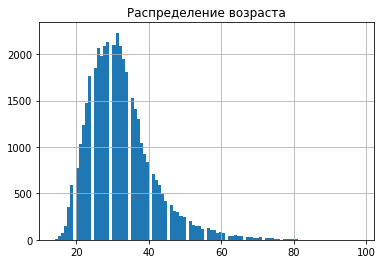

In [224]:
upf.age.hist(bins = 100)
plt.title('Распределение возраста')

In [47]:
upf = up.loc[(up['char_len']==4)& (up['dot_pos']==-1)]

In [51]:
upf['age'] = [(2020-int(upf.iloc[i, 4]))  for i in range(upf.shape[0])]

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [421]:
up = pd.concat([user_profiles_a, user_profiles_b, user_profiles_c])

In [6]:
user_profiles['dot_pos'] =[float(user_profiles.iloc[i, 2].find(".")) if type(user_profiles.iloc[i, 2])!=float 
                                 else user_profiles.iloc[i, 2]
                                 for i in 
                                 range(user_profiles.shape[0])]

In [19]:
user_profiles['dot_pos3'] =[float(user_profiles.iloc[i, 2].find("/")) if type(user_profiles.iloc[i, 2])!=float 
                                 else user_profiles.iloc[i, 2]
                                 for i in 
                                 range(user_profiles.shape[0])]

In [20]:
user_profiles.groupby(['dot_pos3']).count()

,user_id,gender,bdate,dot_pos
dot_pos3,,,,
-1.000000,47758,47729,47758,47758
2.000000,1,1,1,1


In [392]:
ss.find("5")

9

In [390]:
ss = '01.01.1975'

In [ ]:
train_addr_ship['ship_complete_diff_hrs'] = [
#     0 if 
    pd.Timedelta(pd.to_datetime(train_addr_ship.iloc[i,19]) -  pd.to_datetime(train_addr_ship.iloc[i,5])).seconds / 3600.0
#     else (pd.to_datetime(train_addr_ship.iloc[i,15]) -  pd.to_datetime(train_addr_ship.iloc[i,1])).days
    for i in range(train_addr_ship.shape[0])
]

In [368]:
user_profiles.sample(3)

,user_id,gender,bdate
382756,3362538,female,1984-07-23
48404,695709,male,1991-08-09
195452,2542220,NaN,NaN


In [5]:
shipments = pd.read_csv("/data/satbekova/дата мак/shipments.csv", sep='|')

In [3]:
shipments = shipments.loc[:, shipments.columns!='Unnamed: 0']

In [2]:
train_addr_ship = pd.read_csv('train_addr_ship.csv', sep='|')

In [3]:
train_addr_ship = train_addr_ship.loc[:, train_addr_ship.columns!='Unnamed: 0']

In [4]:
train_addr_ship['ship_complete_diff_hrs']  = np.zeros(train_addr_ship.shape[0])

In [5]:
train_addr_ship['ship_complete_diff_hrs'] = [
#     0 if 
    pd.Timedelta(pd.to_datetime(train_addr_ship.iloc[i,19]) -  pd.to_datetime(train_addr_ship.iloc[i,5])).seconds / 3600.0
#     else (pd.to_datetime(train_addr_ship.iloc[i,15]) -  pd.to_datetime(train_addr_ship.iloc[i,1])).days
    for i in range(train_addr_ship.shape[0])
]

In [7]:
train_addr_ship.groupby(['order_completed_at_category']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at_x,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,id,phone_id,order_completed_at_y,target,gender,bdate,ship_complete_diff_hrs
order_completed_at_category,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49158,49158,45641,49160,49160,49160,49160,1644,1637,45641
2020-02,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,64083,69320,69320,69320,69320,2416,2409,64083
2020-03,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,106881,119074,119074,119074,119074,4187,4173,106881
2020-04,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,191885,206801,206801,206801,206801,8479,8459,191885
2020-05,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,354209,371515,371515,371515,371515,16349,16309,354209
2020-06,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,353684,370423,370423,370423,370423,17275,17257,353684
2020-07,366364,366364,366364,366364,366364,366364,366364,366364,366364,366360,366364,366364,366364,366364,366364,366364,366364,366335,366335,346867,366364,366364,366364,366364,17912,17856,346867


In [8]:
train_addr_ship.groupby(['order_completed_at_y']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at_x,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,id,phone_id,target,gender,bdate,ship_complete_diff_hrs
order_completed_at_y,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49160,49158,49158,45641,49160,49160,49160,49160,1644,1637,45641
2020-02,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,69320,64083,69320,69320,69320,69320,2416,2409,64083
2020-03,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,119074,106881,119074,119074,119074,119074,4187,4173,106881
2020-04,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,206801,191885,206801,206801,206801,206801,8479,8459,191885
2020-05,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,371515,354209,371515,371515,371515,371515,16349,16309,354209
2020-06,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,370423,353684,370423,370423,370423,370423,17275,17257,353684
2020-07,366364,366364,366364,366364,366364,366364,366364,366364,366364,366360,366364,366364,366364,366364,366364,366364,366364,366335,366335,346867,366364,366364,366364,366364,17912,17856,346867


In [9]:
train_addr_ship.loc[(train_addr_ship['order_completed_at_category']=='2020-05')].shape

(371515, 28)

In [226]:
train_total.columns

Index(['age_max', 'age_min', 'city_a10_mean', 'city_a10_sum', 'city_a12_mean',
       'city_a12_sum', 'city_a13_mean', 'city_a13_sum', 'city_a14_mean',
       'city_a14_sum',
       ...
       'total_cost_median', 'total_cost_min', 'total_cost_std',
       'total_cost_sum', 'total_weight_max', 'total_weight_mean',
       'total_weight_median', 'total_weight_min', 'total_weight_std',
       'total_weight_sum'],
      dtype='object', length=369)

In [44]:
shipments.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs', 'city', 'retailer_latin'],
      dtype='object')

In [5]:
# shipments = pd.concat([pd.read_csv("/data/satbekova/дата мак/shipments/shipments2020-01-01.csv", sep=','),
# pd.read_csv("/data/satbekova/дата мак/shipments/shipments2020-03-01.csv", sep=','),
# pd.read_csv("/data/satbekova/дата мак/shipments/shipments2020-04-30.csv", sep=','),
# pd.read_csv("/data/satbekova/дата мак/shipments/shipments2020-06-29.csv", sep=',')])

In [113]:
shipments = shipments.loc[:, shipments.columns!='Unnamed: 0']

In [114]:
shipments.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs'],
      dtype='object')

In [12]:
shipments['order_completed_at_category'] = np.zeros(shipments.shape[0])
shipments['order_completed_at_category'] = [str(i)[:7] for i in shipments['order_completed_at']]

In [172]:
shipments.groupby(['order_completed_at_category']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,ship_complete_diff_hrs,ship_sh_start_diff_hrs,city,retailer_latin
order_completed_at_category,,,,,,,,,,,,,,,,,,,,,,,,
2019-12,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,3,3,5,5
2020-01,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60426,60424,60424,51257,51257,51257,60426,60426
2020-02,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,81252,73628,73628,73628,81252,81252
2020-03,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,155755,128397,128397,128397,155755,155755
2020-04,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,258195,230130,230130,230130,258195,258195
2020-05,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441274,441273,441273,414514,414514,414514,441274,441274
2020-06,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,414987,392881,392881,392881,414987,414985
2020-07,419985,419985,419985,419985,419985,419985,419985,419985,419985,419982,419985,419985,419985,419985,419985,419985,419985,419954,419954,392654,392654,392654,419985,419983
2020-08,428807,428807,428807,428807,428807,428807,428807,428807,428807,420754,428807,428807,428807,428807,428807,428807,428807,428797,428797,392206,392206,392206,428807,428757


In [16]:
shipments['ship_complete_diff_hrs'] =np.zeros(shipments.shape[0])

In [17]:
shipments.columns[19]

'shipped_at'

In [59]:
import gc
gc.collect()

20

In [171]:
train.groupby(['order_completed_at']).count()

,phone_id,target
order_completed_at,,
2020-01,59652,59652
2020-02,75985,75985
2020-03,106791,106791
2020-04,159845,159845
2020-05,218569,218569
2020-06,254285,254285
2020-07,284449,284449


In [170]:
train.sample(2)

,phone_id,order_completed_at,target
451821,59150,2020-05,0.000000
153185,11859,2020-06,1.000000


In [60]:
train = pd.read_csv("/data/satbekova/дата мак/train/train.csv", sep=',')

In [61]:
addr = pd.read_csv("/data/satbekova/дата мак/misc/addresses.csv", sep=',')

In [416]:
tx_user = pd.read_csv("/data/satbekova/дата мак/tx_user.csv", sep=',')

In [484]:
tx_user.columns

Index(['Unnamed: 0', 'phone_id', 'NextPurchaseDay', 'Recency', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RecencyCluster', 'RevenueCluster',
       'OverallScore', 'Segment'],
      dtype='object')

In [419]:
tx_user.phone_id.nunique()

583483

In [423]:
user_price01 = pd.read_csv('user_price01.csv', sep='|')
user_price02 = pd.read_csv('user_price02.csv', sep='|')
user_price03 = pd.read_csv('user_price03.csv', sep='|')
user_price04 = pd.read_csv('user_price04.csv', sep='|')
user_price05 = pd.read_csv('user_price05.csv', sep='|')
user_price06 = pd.read_csv('user_price06.csv', sep='|')
user_price07 = pd.read_csv('user_price07.csv', sep='|')

In [471]:
user_price08 = pd.read_csv('user_price08.csv', sep='|')

In [504]:
user_price08 = user_price08.loc[:, user_price08.columns!='Unnamed: 0']
user_price08.shape

(214073, 5)

In [426]:
u_prices = u_prices.loc[:, u_prices.columns!='Unnamed: 0']

In [427]:
u_prices.sample(2)

,order_completed_at_category,phone_id,all_product_price_sum,all_product_price_count,avg_prive
103574,2020-06,169834,2338.730003,1,2338.730003
27422,2020-01,155357,2968.560005,1,2968.560005


In [435]:
train_new2.to_csv('train_new2.csv', sep='|')

In [473]:
train_new2.columns

Index(['ship_complete_diff_hrs_min', 'total_weight_min',
       'ship_complete_diff_hrs_std', 'total_weight_sum',
       'ship_sh_start_diff_hrs_min', 'total_weight_max', 'total_cost_std',
       'ship_sh_start_diff_hrs_std', 'total_weight_median', 'total_cost_mean',
       ...
       'Recency', 'Frequency', 'FrequencyCluster', 'Revenue', 'RecencyCluster',
       'RevenueCluster', 'OverallScore', 'High-Value', 'Low-Value',
       'Mid-Value'],
      dtype='object', length=101)

In [503]:
gc.collect()

20

In [517]:
list(set(train_new2.columns) - set(sam_sub_orig2.columns))

['target', 'order_completed_at']

In [544]:
sam_sub_orig2.phone_id.nunique()

159212

In [ ]:
sample_subm = pd.read_csv('')

In [545]:
sam_sub_orig2.columns

Index(['total_weight_median', 'city_a66_sum', 'promo_total_std',
       'promo_total_max', 'city_a21_mean', 'city_a69_mean',
       'platform_web_mean', 'ship_sh_start_diff_hrs_min', 'total_weight_min',
       'retailer_latin_ret3_sum', 'city_a75_sum', 'total_weight_mean',
       'age_max', 'city_a43_mean', 'rate_median', 'total_weight_std',
       'total_cost_max', 'os_ios_mean', 'retailer_latin_ret26_mean',
       'city_a44_mean', 'total_cost_mean', 'total_cost_std',
       'total_cost_median', 'city_a29_sum', 'city_a44_sum', 'city_a30_sum',
       'city_a15_mean', 's.order_state_complete_mean',
       'retailer_latin_ret3_median', 'ship_complete_diff_hrs_mean',
       'platform_app_mean', 'platform_app_median', 'total_cost_sum',
       'city_a55_sum', 'city_a52_mean', 'os_windows_mean', 'os_android_mean',
       'city_a82_sum', 'retailer_latin_ret3_mean', 'city_a68_sum',
       'city_a46_mean', 'ship_sh_start_diff_hrs_std', 'city_a49_sum',
       'city_a16_mean', 's.order_state_comp

In [ ]:
sam_sub_orig2

In [483]:
# list(set(sam_sub_orig.columns) -set(train_new2.columns))

In [486]:
sam_sub_orig2 = sam_sub_orig[list(set(train_new2.columns) & set(sam_sub_orig.columns))].merge(
   tx_user[['phone_id', 'NextPurchaseDay', 'Recency', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RecencyCluster', 'RevenueCluster',
       'OverallScore', 'Segment']], how='left', on='phone_id')

In [491]:
sam_sub_orig2.columns

Index(['total_weight_median', 'city_a66_sum', 'promo_total_std',
       'promo_total_max', 'city_a21_mean', 'city_a69_mean',
       'platform_web_mean', 'ship_sh_start_diff_hrs_min', 'total_weight_min',
       'retailer_latin_ret3_sum', 'city_a75_sum', 'total_weight_mean',
       'age_max', 'city_a43_mean', 'rate_median', 'total_weight_std',
       'total_cost_max', 'os_ios_mean', 'retailer_latin_ret26_mean',
       'city_a44_mean', 'total_cost_mean', 'total_cost_std',
       'total_cost_median', 'city_a29_sum', 'city_a44_sum', 'city_a30_sum',
       'city_a15_mean', 's.order_state_complete_mean',
       'retailer_latin_ret3_median', 'ship_complete_diff_hrs_mean',
       'platform_app_mean', 'platform_app_median', 'total_cost_sum',
       'city_a55_sum', 'city_a52_mean', 'os_windows_mean', 'os_android_mean',
       'city_a82_sum', 'retailer_latin_ret3_mean', 'city_a68_sum',
       'city_a46_mean', 'ship_sh_start_diff_hrs_std', 'city_a49_sum',
       'city_a16_mean', 's.order_state_comp

In [490]:
# messages_new.groupby(['date_time_month']).count()

In [495]:
sam_sub_orig2 = sam_sub_orig2.merge(
    messages_new.loc[(messages_new['type']=='email') & (messages_new['date_time_month']=='2020-08')], 
    how='left', on = ['phone_id']
).merge(
    messages_new.loc[(messages_new['type']=='push')& (messages_new['date_time_month']=='2020-08')], 
    how='left', on = ['phone_id']
).merge(
    messages_new.loc[(messages_new['type']=='sms')& (messages_new['date_time_month']=='2020-08')], 
    how='left', on = ['phone_id']
)

In [500]:
sam_sub_orig2 = sam_sub_orig2.loc[:, ~sam_sub_orig2.columns.isin(['date_time_month_x', 'type_x', 'date_time_month_y', 
                                                                 'type_y', 'date_time_month',
       'type',])]

In [516]:
sam_sub_orig2['Low-Value'] = np.zeros(sam_sub_orig2.shape[0])

In [508]:
sam_sub_orig2 = sam_sub_orig2.merge(user_price08, how='left', left_on = ['phone_id'], 
                right_on = ['phone_id'])

In [513]:
# train_new2
sam_sub_orig2 =pd.concat([sam_sub_orig2.loc[:, sam_sub_orig2.columns!='Segment'], pd.get_dummies(sam_sub_orig2['Segment'])], 
                      axis=1)

In [518]:
sam_sub_orig2.sample(10)

,total_weight_median,city_a66_sum,promo_total_std,promo_total_max,city_a21_mean,city_a69_mean,platform_web_mean,ship_sh_start_diff_hrs_min,total_weight_min,retailer_latin_ret3_sum,city_a75_sum,total_weight_mean,age_max,city_a43_mean,rate_median,total_weight_std,total_cost_max,os_ios_mean,retailer_latin_ret26_mean,city_a44_mean,total_cost_mean,total_cost_std,total_cost_median,city_a29_sum,city_a44_sum,city_a30_sum,city_a15_mean,s.order_state_complete_mean,retailer_latin_ret3_median,ship_complete_diff_hrs_mean,platform_app_mean,platform_app_median,total_cost_sum,city_a55_sum,city_a52_mean,os_windows_mean,os_android_mean,city_a82_sum,retailer_latin_ret3_mean,city_a68_sum,...,retailer_latin_ret11_mean,city_a57_sum,age_min,ship_complete_diff_hrs_std,rate_std,s.order_state_canceled_mean,s.order_state_canceled_sum,city_a29_mean,total_weight_sum,promo_total_mean,promo_total_min,promo_total_median,rate_min,city_a43_sum,city_a21_sum,city_a17_sum,retailer_latin_ret1_mean,rate_max,city_a69_sum,ship_complete_diff_hrs_max,city_a82_mean,rate_mean,NextPurchaseDay,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore,type_count_x,type_count_y,type_count,order_completed_at_category,all_product_price_sum,all_product_price_count,avg_prive,High-Value,Mid-Value,Low-Value
127301,7350.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,1.293056,7350.000000,1.000000,0.000000,7350.000000,nan,0.000000,0.000000,nan,158.000000,0.000000,0.000000,1.000000,158.000000,nan,158.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.866389,1.000000,1.000000,158.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,nan,nan,nan,0.000000,0.000000,0.000000,7350.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.866389,0.000000,0.000000,151.000000,28.000000,2.000000,0.000000,11486.620009,3.000000,0.000000,3.000000,nan,9.000000,nan,2020-08,7552.680023,1.000000,7552.680023,0,1,0.000000
189690,5750.000000,0.000000,nan,0.000000,0.000000,1.000000,0.000000,0.390278,5750.000000,1.000000,0.000000,5750.000000,nan,0.000000,0.000000,nan,158.000000,0.000000,0.000000,0.000000,158.000000,nan,158.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.284722,1.000000,1.000000,158.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,nan,nan,nan,0.000000,0.000000,0.000000,5750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.284722,0.000000,0.000000,67.000000,28.000000,3.000000,0.000000,8555.309987,3.000000,0.000000,3.000000,2.000000,13.000000,nan,2020-08,1338.299988,1.000000,1338.299988,0,1,0.000000
38720,21028.000000,0.000000,nan,-200.000000,0.000000,0.000000,0.000000,0.817222,21028.000000,1.000000,0.000000,21028.000000,nan,1.000000,0.000000,nan,158.000000,0.000000,0.000000,0.000000,158.000000,nan,158.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.127222,1.000000,1.000000,158.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,nan,nan,nan,0.000000,0.000000,0.000000,21028.000000,-200.000000,-200.000000,-200.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.127222,0.000000,0.000000,80.000000,10.000000,3.000000,0.000000,9249.480128,3.000000,0.000000,3.000000,nan,13.000000,nan,2020-08,2386.040047,1.000000,2386.040047,0,1,0.000000
166648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,0,0,0.000000
75861,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [438]:
train_new2 = train_new2.merge(tx_user[['phone_id', 'NextPurchaseDay', 'Recency', 'Frequency',
       'FrequencyCluster', 'Revenue', 'RecencyCluster', 'RevenueCluster',
       'OverallScore', 'Segment']], how='left', on='phone_id')

In [459]:
train_new2.shape

(692773, 99)

In [460]:
# train_new2
train_new2 =pd.concat([train_new2.loc[:, train_new2.columns!='Segment'], pd.get_dummies(train_new2['Segment'])], axis=1)

In [454]:
train_new2.groupby(['Segment']).count()

,ship_complete_diff_hrs_min,total_weight_min,ship_complete_diff_hrs_std,total_weight_sum,ship_sh_start_diff_hrs_min,total_weight_max,total_cost_std,ship_sh_start_diff_hrs_std,total_weight_median,total_cost_mean,ship_complete_diff_hrs_median,total_weight_std,ship_complete_diff_hrs_max,ship_sh_start_diff_hrs_max,ship_complete_diff_hrs_mean,rate_mean,total_cost_sum,total_weight_mean,total_cost_min,ship_sh_start_diff_hrs_median,ship_sh_start_diff_hrs_mean,s.order_state_complete_sum,total_cost_median,promo_total_min,promo_total_std,rate_std,retailer_latin_ret3_mean,promo_total_mean,retailer_latin_ret3_sum,total_cost_max,promo_total_sum,promo_total_median,rate_median,retailer_latin_ret26_mean,rate_max,city_a43_mean,age_max,platform_app_mean,retailer_latin_ret11_mean,rate_min,...,city_a82_mean,platform_app_median,city_a75_sum,city_a69_mean,city_a44_sum,city_a46_mean,city_a82_sum,city_a66_sum,city_a78_sum,retailer_latin_ret1_mean,city_a68_sum,city_a15_mean,city_a56_mean,city_a55_sum,city_a49_sum,city_a21_sum,city_a17_sum,retailer_latin_ret25_mean,retailer_latin_ret3_median,s.order_state_canceled_sum,city_a30_sum,city_a16_mean,type_count_x,type_count_y,type_count,phone_id,target,order_completed_at,order_completed_at_category,all_product_price_sum,all_product_price_count,avg_prive,NextPurchaseDay,Recency,Frequency,FrequencyCluster,Revenue,RecencyCluster,RevenueCluster,OverallScore
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High-Value,310492,312239,221703,312239,310492,312239,227970,221703,312239,312239,310492,227970,310492,310492,310492,312239,312239,312239,312239,310492,310492,312239,312239,312239,227970,227970,312239,312239,312239,312239,312239,312239,312239,312239,312239,312239,11252,312239,312239,312239,...,283181,312239,299811,312239,312239,211130,283181,312239,299811,73133,312239,211130,211130,312239,312239,73133,312239,255390,312239,312239,255390,299811,118415,238073,0,312239,312239,312239,311813,311813,311813,311813,312239,312239,312239,312239,312239,312239,312239,312239
Low-Value,27188,27543,4618,27543,27188,27543,5894,4618,27543,27543,27188,5894,27188,27188,27188,27543,27543,27543,27543,27188,27188,27543,27543,27543,5894,5894,27543,27543,27543,27543,27543,27543,27543,27543,27543,27543,521,27543,27543,27543,...,13729,27543,21280,27543,27543,0,13729,27543,21280,0,27543,0,0,27543,27543,0,27543,3927,27543,27543,3927,21280,11344,21789,0,27543,27543,27543,27498,27498,27498,27498,27543,27543,27543,27543,27543,27543,27543,27543
Mid-Value,349732,352860,109016,352860,349732,352860,119126,109016,352860,352860,349732,119126,349732,349732,349732,352860,352860,352860,352860,349732,349732,352860,352860,352860,119126,119126,352860,352860,352860,352860,352860,352860,352860,352860,352860,352860,9238,352860,352860,352860,...,330715,352860,343854,352860,352860,256105,330715,352860,343854,84113,352860,256105,256105,352860,352860,84113,352860,305757,352860,352860,305757,343854,190210,249439,0,352860,352860,352860,350977,350977,350977,350977,352860,352860,352860,352860,352860,352860,352860,352860


In [456]:
train_new2.loc[train_new2['Segment'].isnull(), ''].shape

(131, 99)

In [453]:
train_new2[['Segment']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692773 entries, 0 to 692772
Data columns (total 1 columns):
Segment    692642 non-null object
dtypes: object(1)
memory usage: 10.6+ MB


In [440]:
# train_new2.info()

In [443]:
gc.collect()

20

In [433]:
train_new2 = train_new2.merge(u_prices, how='left', left_on = ['phone_id','order_completed_at'], 
                right_on = ['phone_id','order_completed_at_category'])

In [424]:
u_prices = pd.concat([
    user_price01, 
    user_price02,
    user_price03,
    user_price04,
    user_price05,
    user_price06,
    user_price07,
    
])

In [26]:
shipments.loc[shipments['order_completed_at_category']=='2020-05'].columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs'],
      dtype='object')

In [122]:
shipments.loc[shipments['order_completed_at_category']=='2020-05', 'ship_address_id'].nunique()

433864

In [81]:
shipments = shipments.merge(upf[['age', 'user_id']], how='left', on='user_id')

In [83]:
shipments = shipments.merge(user_profiles[['user_id', 'gender']].drop_duplicates(), how='left', on='user_id')

In [80]:
shipments.shape

(2260686, 23)

In [274]:
sh01 = shipments.loc[shipments['order_completed_at_category']=='2020-01']

In [317]:
sh02 = shipments.loc[shipments['order_completed_at_category']=='2020-02']

In [276]:
sh03 = shipments.loc[shipments['order_completed_at_category']=='2020-03']

In [277]:
sh04 = shipments.loc[shipments['order_completed_at_category']=='2020-04']

In [121]:
# 
sh05 = shipments.loc[shipments['order_completed_at_category']=='2020-05']
# sh05b = shipments.loc[shipments['order_completed_at_category']=='2020-05']

In [349]:
sh06 = shipments.loc[shipments['order_completed_at_category']=='2020-06']

In [279]:
sh07 = shipments.loc[shipments['order_completed_at_category']=='2020-07']

In [183]:
sh08 = shipments.loc[shipments['order_completed_at_category']=='2020-08']

In [546]:
sample_subm = pd.read_csv('/data/satbekova/дата мак/sample_submission.csv', sep=';')

In [185]:
sh08.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs', 'city', 'retailer_latin'],
      dtype='object')

In [124]:
sh05.ship_address_id.nunique(), sh05.shape

(433864, (456661, 27))

In [280]:
sh01 = sh01.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh01.shape

(61117, 27)

In [318]:
sh02 = sh02.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh02.shape


(82469, 27)

In [282]:
sh03 = sh03.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh03.shape

(160863, 27)

In [283]:
sh04 = sh04.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh04.shape

(265214, 27)

In [123]:
sh05 = sh05.merge(addr, how='inner', left_on='ship_address_id', right_on='id')

In [286]:
sh05.shape

(456661, 111)

In [346]:
addr.sample(2)

,id,phone_id
1317760,6761330,147773
2629743,13998605,617411


In [350]:
sh06 = sh06.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh06.shape, sh06.phone_id.nunique()

((430128, 27), 200865)

In [348]:
sh06.shape

(462450, 29)

In [285]:
sh07 = sh07.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh07.shape

(434057, 27)

In [192]:
sh08 = sh08.merge(addr, how='inner', left_on='ship_address_id', right_on='id')
sh08.shape

(442174, 27)

In [134]:
sh05.sample(5)

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,ship_complete_diff_hrs,ship_sh_start_diff_hrs,city,retailer_latin,id,phone_id,s.order_state_canceled,s.order_state_complete,s.order_state_resumed,dw_kind_courier,dw_kind_pickup,city_a1,city_a15,city_a16,city_a17,city_a18,city_a19,city_a22,city_a23,...,city_a68,city_a69,city_a7,city_a70,city_a71,city_a72,city_a73,city_a74,city_a75,city_a77,city_a78,city_a80,city_a81,city_a82,city_a83,city_a85,city_a86,city_a89,city_a90,city_a91,city_a97,retailer_latin_ret10,retailer_latin_ret11,retailer_latin_ret13,retailer_latin_ret16,retailer_latin_ret17,retailer_latin_ret20,retailer_latin_ret25,retailer_latin_ret26,retailer_latin_ret28,retailer_latin_ret3,retailer_latin_ret9,platform_app,platform_web,os_android,os_ios,os_linux,os_mac,os_other,os_windows
42152,1719784,6549569,4965071,9382035,2020-05-02 06:44:52,2020-05-02 08:00:51,2020-05-02 13:00:00,Ашан,complete,shipped,Москва,183,98.000000,5,courier,0.000000,12712,app,android,2020-05-02 14:32:45,2020-05,6.531667,1.545833,a43,ret11,6549569,60557,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
141110,1662548,6274821,5283924,9101047,2020-04-27 04:43:45,2020-05-09 17:54:25,2020-05-10 05:00:00,METRO,complete,shipped,Новосибирск,110,158.000000,4,courier,0.000000,8467,app,android,2020-05-10 06:35:35,2020-05,12.686111,1.593056,a53,ret3,6274821,155820,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
171520,1826170,7068890,5379401,9922300,2020-05-12 07:43:43,2020-05-12 11:28:00,2020-05-12 16:00:00,Ашан,complete,shipped,Москва,239,98.000000,0,courier,0.000000,1390,app,android,2020-05-12 16:17:34,2020-05,4.826111,0.292778,a43,ret11,7068890,230700,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
424339,1505881,5854778,6170662,8688506,2020-04-18 16:26:17,2020-05-31 05:43:42,2020-05-31 10:00:00,METRO,complete,shipped,Уфа,98,158.000000,5,courier,-500.000000,7016,app,ios,2020-05-31 10:07:03,2020-05,4.389167,0.117500,a86,ret3,5854778,640657,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
73604,1746475,6681757,5071113,9519423,2020-05-04 13:56:30,2020-05-04 17:43:28,2020-05-05 16:00:00,METRO,canceled,canceled,Астрахань,191,98.000000,0,courier,-250.000000,6180,app,ios,NaN,2020-05,nan,nan,a5,ret3,6681757,115167,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0


In [18]:
# shipment_state
sh05.groupby(['shipment_state']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,ship_complete_diff_hrs,ship_sh_start_diff_hrs,id,phone_id
shipment_state,,,,,,,,,,,,,,,,,,,,,,,,
canceled,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,0,27093,0,0,27093,27093
collecting,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,179,0,179,0,0,179,179
ready,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,0,147,0,0,147,147
ready_to_ship,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,0,144,0,0,144,144
shipped,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428986,428985,428985,428957,428986,428957,428957,428986,428986
shipping,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,112,4,112,4,4,112,112


In [16]:
sh05.groupby(['s.order_state']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,shipment_state,s.city_name,s.store_id,total_cost,rate,dw_kind,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,ship_complete_diff_hrs,ship_sh_start_diff_hrs,id,phone_id
s.order_state,,,,,,,,,,,,,,,,,,,,,,,,
canceled,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,27093,0,27093,0,0,27093,27093
complete,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428977,428976,428976,428467,428977,428467,428467,428977,428977
resumed,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,591,494,591,494,494,591,591


In [14]:
sh05.groupby(['dw_kind']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,rate,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,ship_complete_diff_hrs,ship_sh_start_diff_hrs,id,phone_id
dw_kind,,,,,,,,,,,,,,,,,,,,,,,,
courier,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456392,456391,456391,428737,456392,428737,428737,456392,456392
pickup,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,224,269,224,224,269,269


In [131]:
shipments.loc[shipments['']].ship_address_id.nunique()

2226096

In [140]:
sh05.shape

(456661, 103)

In [144]:
# sh05 = sh05.merge(shipments.loc[shipments['order_completed_at_category']=='2020-05', ['ship_address_id',
#                                                                               'ship_complete_diff_hrs',
#        'ship_sh_start_diff_hrs', 'retailer', 'shipment_id']].drop_duplicates (), 
#           how='inner', on=['ship_address_id', 'retailer', 'shipment_id'])

In [52]:
sh05.shape

(456661, 27)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

In [37]:
from sklearn.pipeline import Pipeline

In [126]:
ohe_status = pd.get_dummies(sh05[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [258]:
ohe_status_01 = pd.get_dummies(sh01[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [259]:
ohe_status_02 = pd.get_dummies(sh02[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [260]:
ohe_status_03 = pd.get_dummies(sh03[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [261]:
ohe_status_04 = pd.get_dummies(sh04[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [262]:
ohe_status_06 = pd.get_dummies(sh06[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [263]:
ohe_status_07 = pd.get_dummies(sh07[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [288]:
gc.collect()

20

In [193]:
ohe_status_08 = pd.get_dummies(sh08[['s.order_state', 'dw_kind', 'city', 'retailer_latin', 'platform', 'os']])

In [194]:
ohe_status_08.sample(3)

,s.order_state_canceled,s.order_state_cart,s.order_state_complete,s.order_state_resumed,dw_kind_courier,dw_kind_express_delivery,dw_kind_pickup,city_a1,city_a10,city_a11,city_a12,city_a13,city_a14,city_a15,city_a16,city_a17,city_a18,city_a19,city_a2,city_a20,city_a21,city_a22,city_a23,city_a24,city_a25,city_a26,city_a27,city_a28,city_a29,city_a3,city_a30,city_a31,city_a32,city_a33,city_a34,city_a35,city_a36,city_a37,city_a38,city_a39,...,retailer_latin_ret21,retailer_latin_ret22,retailer_latin_ret23,retailer_latin_ret24,retailer_latin_ret25,retailer_latin_ret26,retailer_latin_ret27,retailer_latin_ret28,retailer_latin_ret29,retailer_latin_ret3,retailer_latin_ret30,retailer_latin_ret31,retailer_latin_ret32,retailer_latin_ret33,retailer_latin_ret34,retailer_latin_ret35,retailer_latin_ret36,retailer_latin_ret37,retailer_latin_ret38,retailer_latin_ret4,retailer_latin_ret40,retailer_latin_ret41,retailer_latin_ret42,retailer_latin_ret43,retailer_latin_ret44,retailer_latin_ret45,retailer_latin_ret46,retailer_latin_ret5,retailer_latin_ret6,retailer_latin_ret7,retailer_latin_ret8,retailer_latin_ret9,platform_app,platform_web,os_android,os_ios,os_linux,os_mac,os_other,os_windows
132147,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
203602,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
8709,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [127]:
ohe_status.shape, sh05.shape

((456661, 84), (456661, 27))

In [289]:
sh01 = pd.concat([sh01, ohe_status_01], axis=1)
sh01.shape

(61117, 65)

In [320]:
sh02 = pd.concat([sh02, ohe_status_02], axis=1)
sh02.shape

(82469, 69)

In [293]:
sh03 = pd.concat([sh03, ohe_status_03], axis=1)
sh03.shape

(160863, 74)

In [294]:
sh04 = pd.concat([sh04, ohe_status_04], axis=1)
sh04.shape

(265214, 98)

In [296]:
# sh05 = pd.concat([sh05, ohe_status_05], axis=1)
sh05.shape

(456661, 111)

In [351]:
sh06 = pd.concat([sh06, ohe_status_06], axis=1)
sh06.shape

(430128, 167)

In [298]:
sh07 = pd.concat([sh07, ohe_status_07], axis=1)
sh07.shape

(434057, 176)

In [321]:
sh01.shape, sh02.shape, sh03.shape, sh04.shape, sh05.shape, sh06.shape, sh07.shape

((61117, 65),
 (82469, 69),
 (160863, 74),
 (265214, 98),
 (456661, 111),
 (430128, 167),
 (434057, 176))

In [196]:
sh08 = pd.concat([sh08, ohe_status_08], axis=1)

In [197]:
sh08.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442174 entries, 0 to 442173
Columns: 184 entries, user_id to os_windows
dtypes: float64(4), int64(9), object(14), uint8(157)
memory usage: 160.7+ MB


In [198]:
sh08.shape

(442174, 184)

In [129]:
sh05.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456661 entries, 0 to 456660
Columns: 111 entries, user_id to os_windows
dtypes: float64(4), int64(9), object(14), uint8(84)
memory usage: 134.1+ MB


In [63]:
shipments = shipments.loc[:, shipments.columns!='Unnamed: 0']

In [65]:
shipments.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs'],
      dtype='object')

In [54]:
shipments[['retailer',  'retailer_latin','user_id']].groupby(['retailer']).count()[:2]

,retailer_latin,user_id
retailer,,
BILLA,3153,3153
Home Market,74,74


In [130]:
shipments['retailer_latin'] = shipments['retailer']

In [131]:
shipments['retailer_latin']  =  shipments['retailer_latin'].map({'BILLA': 'ret1',
'Home Market': 'ret2',
'METRO': 'ret3',
'REAL': 'ret4',
'SELGROS': 'ret5',
'YVES ROCHER': 'ret6',
'АГРОКОМПЛЕКС': 'ret7',
'АУТЛЕТ': 'ret8',
'Азбука Вкуса': 'ret9',
'Аллея': 'ret10',
'Ашан': 'ret11',
'БЕГЕМАГ': 'ret12',
'Бахетле': 'ret13',
'Быстроном': 'ret14',
'ВЕГА': 'ret15',
'ВИКТОРИЯ': 'ret16',
'ВкусВилл': 'ret17',
'ДЕЯ': 'ret18',
'Дочки-Сыночки': 'ret19',
'ЗЕЛЕНОЕ ЯБЛОКО': 'ret20',
'Забайкальский Привозъ': 'ret21',
'ИДЕЯ': 'ret22',
'КАРАВАН': 'ret23',
'КИТ': 'ret24',
'Командор': 'ret25',
'Лента': 'ret26',
'МАГНОЛИЯ': 'ret27',
'МЕГАМАРТ': 'ret28',
'МаксМаркет': 'ret29',
'Осень': 'ret30',
'ПАРУС': 'ret31',
'ПроВино': 'ret32',
'СЕДЬМАЯ СТОЛИЦА': 'ret33',
'СИГМА': 'ret34',
'СберМаркет': 'ret35',
'Столичный': 'ret36',
'ТД ХОРОШИЙ': 'ret37',
'ТИТАН': 'ret38',
'ТЦ "Новомариинский"': 'ret39',
'ТЦ STOЛИЦА': 'ret40',
'УДАЧНАЯ ПОКУПКА': 'ret41',
'Улыбка Радуги': 'ret42',
'Фреш25': 'ret43',
'Хороший': 'ret44',
'Шан': 'ret45',
'ЮгОпт': 'ret46'})

In [132]:
shipments['city'] = shipments['s.city_name']

In [133]:
shipments['city']  =  shipments['city'].map({'Абакан': 'a1',
'Альметьевск': 'a2',
'Анадырь': 'a3',
'Архангельск': 'a4',
'Астрахань': 'a5',
'Барнаул': 'a6',
'Белгород': 'a7',
'Бийск': 'a8',
'Биробиджан': 'a9',
'Благовещенск': 'a10',
'Братск': 'a11',
'Брянск': 'a12',
'Великий Новгород': 'a13',
'Владивосток': 'a14',
'Владикавказ': 'a15',
'Владимир': 'a16',
'Волгоград': 'a17',
'Вологда': 'a18',
'Воронеж': 'a19',
'Горно-Алтайск': 'a20',
'Грозный': 'a21',
'Екатеринбург': 'a22',
'Иваново': 'a23',
'Ижевск': 'a24',
'Иркутск': 'a25',
'Йошкар-Ола': 'a26',
'Казань': 'a27',
'Калининград': 'a28',
'Калуга': 'a29',
'Кемерово': 'a30',
'Киров': 'a31',
'Кострома': 'a32',
'Краснодар': 'a33',
'Красноярск': 'a34',
'Курган': 'a35',
'Курск': 'a36',
'Кызыл': 'a37',
'Липецк': 'a38',
'Магадан': 'a39',
'Магнитогорск': 'a40',
'Майкоп': 'a41',
'Махачкала': 'a42',
'Москва': 'a43',
'Московская Область': 'a44',
'Мурманск': 'a45',
'Набережные Челны': 'a46',
'Нальчик': 'a47',
'Нарьян-Мар': 'a48',
'Нижний Новгород': 'a49',
'Нижний Тагил': 'a50',
'Новокузнецк': 'a51',
'Новороссийск': 'a52',
'Новосибирск': 'a53',
'Ноябрьск': 'a54',
'Омск': 'a55',
'Орел': 'a56',
'Оренбург': 'a57',
'Орск': 'a58',
'Пенза': 'a59',
'Пермь': 'a60',
'Петрозаводск': 'a61',
'Петропавловск-Камчатский': 'a62',
'Прокопьевск': 'a63',
'Псков': 'a64',
'Пятигорск': 'a65',
'Ростов-на-Дону': 'a66',
'Рязань': 'a67',
'Самара': 'a68',
'Санкт-Петербург': 'a69',
'Саранск': 'a70',
'Саратов': 'a71',
'Смоленск': 'a72',
'Ставрополь': 'a73',
'Стерлитамак': 'a74',
'Сургут': 'a75',
'Сыктывкар': 'a76',
'Тамбов': 'a77',
'Тверь': 'a78',
'Тобольск': 'a79',
'Тольятти': 'a80',
'Томск': 'a81',
'Тула': 'a82',
'Тюмень': 'a83',
'Улан-Удэ': 'a84',
'Ульяновск': 'a85',
'Уфа': 'a86',
'Хабаровск': 'a87',
'Ханты-Мансийск': 'a88',
'Чебоксары': 'a89',
'Челябинск': 'a90',
'Черкесск': 'a91',
'Чита': 'a92',
'Элиста': 'a93',
'Южно-Сахалинск': 'a94',
'Юрга': 'a95',
'Якутск': 'a96',
'Ярославль': 'a97'})

In [24]:
shipments.groupby(['s.store_id']).count().shape

(599, 22)

In [26]:
shipments.groupby(['rate']).count()

,user_id,ship_address_id,shipment_id,order_id,order_created_at,order_completed_at,shipment_starts_at,retailer,s.order_state,shipment_state,s.city_name,s.store_id,total_cost,dw_kind,promo_total,total_weight,platform,os,shipped_at,order_completed_at_category,ship_complete_diff_hrs,ship_sh_start_diff_hrs
rate,,,,,,,,,,,,,,,,,,,,,,
0,856368,856368,856368,856368,856368,856368,856368,856368,856368,848312,856368,856368,856368,856368,856368,856368,856349,856349,671480,856368,671480,671480
1,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19823,19822,19822,19819,19823,19819,19819
2,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10073,10072,10073,10072,10072
3,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38379,38375,38379,38375,38375
4,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104867,104864,104864,104851,104867,104851,104851
5,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231176,1231155,1231155,1231073,1231176,1231073,1231073


In [96]:
sh05.columns[:40]

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs', 'city', 'retailer_latin', 'id', 'phone_id',
       's.order_state_canceled', 's.order_state_complete',
       's.order_state_resumed', 'dw_kind_courier', 'dw_kind_pickup', 'city_a1',
       'city_a15', 'city_a16', 'city_a17', 'city_a18', 'city_a19', 'city_a22',
       'city_a23'],
      dtype='object')

In [137]:
sh05.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state',
       ...
       'retailer_latin_ret3', 'retailer_latin_ret9', 'platform_app',
       'platform_web', 'os_android', 'os_ios', 'os_linux', 'os_mac',
       'os_other', 'os_windows'],
      dtype='object', length=111)

In [111]:
# ohe_status.columns.tolist()

In [70]:
train.groupby(['target']).count()

,phone_id,order_completed_at
target,,
0.000000,579321,579321
1.000000,580255,580255


In [ ]:
# sh05.mean()

In [102]:
# ohe_status.columns.tolist()

In [60]:
sh05_aggr_sum = sh05[['phone_id']+ohe_status.columns.tolist()].groupby(['phone_id']).sum().reset_index()

In [61]:
sh05_aggr_mean = sh05[['phone_id']+ohe_status.columns.tolist()].groupby(['phone_id']).mean().reset_index()

In [303]:
sh01_aggr = sh01.groupby(['phone_id']).agg(
    {
#     'city_a1':['sum', 'mean'],
#      'city_a2':['sum', 'mean'],
#      'city_a3':['sum', 'mean'],
#      'city_a4':['sum', 'mean'],
#      'city_a5':['sum', 'mean'],
#      'city_a6':['sum', 'mean'],
#      'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
#      'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
#      'city_a12':['sum', 'mean'],
#      'city_a13':['sum', 'mean'],
#      'city_a14':['sum', 'mean'],
#      'city_a15':['sum', 'mean'],
#      'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
#      'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
#      'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
#      'city_a23':['sum', 'mean'],
#      'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
#      'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
#      'city_a29':['sum', 'mean'],
#      'city_a30':['sum', 'mean'],
#      'city_a31':['sum', 'mean'],
#      'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
#      'city_a35':['sum', 'mean'],
#      'city_a36':['sum', 'mean'],
#      'city_a37':['sum', 'mean'],
#      'city_a38':['sum', 'mean'],
#      'city_a39':['sum', 'mean'],
#      'city_a40':['sum', 'mean'],
#      'city_a41':['sum', 'mean'],
#      'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
#      'city_a45':['sum', 'mean'],
#      'city_a46':['sum', 'mean'],
#      'city_a47':['sum', 'mean'],
#      'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
#      'city_a50':['sum', 'mean'],
#      'city_a51':['sum', 'mean'],
#      'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
#      'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
#      'city_a56':['sum', 'mean'],
#      'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
#      'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
#      'city_a61':['sum', 'mean'],
#      'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
#      'city_a64':['sum', 'mean'],
#      'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
#      'city_a70':['sum', 'mean'],
#      'city_a71':['sum', 'mean'],
#      'city_a72':['sum', 'mean'],
#      'city_a73':['sum', 'mean'],
#      'city_a74':['sum', 'mean'],
#      'city_a75':['sum', 'mean'],
#      'city_a76':['sum', 'mean'],
#      'city_a77':['sum', 'mean'],
#      'city_a78':['sum', 'mean'],
#      'city_a79':['sum', 'mean'],
#      'city_a80':['sum', 'mean'],
#      'city_a81':['sum', 'mean'],
#      'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
#      'city_a84':['sum', 'mean'],
#      'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
#      'city_a87':['sum', 'mean'],
#      'city_a88':['sum', 'mean'],
#      'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
#      'city_a91':['sum', 'mean'],
#      'city_a92':['sum', 'mean'],
#      'city_a93':['sum', 'mean'],
#      'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
#      'city_a96':['sum', 'mean'],
#      'city_a97':['sum', 'mean'], 
#      'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
#      'retailer_latin_ret13':['sum', 'mean', 'median'],
#      'retailer_latin_ret16':['sum', 'mean', 'median'],
     'retailer_latin_ret17':['sum', 'mean', 'median'],
#      'retailer_latin_ret20':['sum', 'mean', 'median'],
#      'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
#      'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
     'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh01_aggr.shape)

(37659, 115)


In [311]:
sh02.shape

(84909, 155)

In [326]:
sh02.phone_id.nunique()

48312

In [325]:
#        'city_a60', 'city_a66', 'city_a67', 'city_a68', 'city_a69', 'city_a75',
#        'city_a78', 'city_a83', 'city_a86', 'city_a90', 'city_a97',
#        'retailer_latin_ret11', 'retailer_latin_ret17', 'retailer_latin_ret26',
#        'retailer_latin_ret3', 'retailer_latin_ret9',
sh02_aggr = sh02.groupby(['phone_id']).agg(
    {
#     'city_a1':['sum', 'mean'],
#      'city_a2':['sum', 'mean'],
#      'city_a3':['sum', 'mean'],
#      'city_a4':['sum', 'mean'],
#      'city_a5':['sum', 'mean'],
#      'city_a6':['sum', 'mean'],
#      'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
#      'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
#      'city_a12':['sum', 'mean'],
#      'city_a13':['sum', 'mean'],
#      'city_a14':['sum', 'mean'],
#      'city_a15':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
#      'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
#      'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
#      'city_a23':['sum', 'mean'],
#      'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
#      'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
#      'city_a29':['sum', 'mean'],
#      'city_a30':['sum', 'mean'],
#      'city_a31':['sum', 'mean'],
#      'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
#      'city_a35':['sum', 'mean'],
#      'city_a36':['sum', 'mean'],
#      'city_a37':['sum', 'mean'],
#      'city_a38':['sum', 'mean'],
#      'city_a39':['sum', 'mean'],
#      'city_a40':['sum', 'mean'],
#      'city_a41':['sum', 'mean'],
#      'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
#      'city_a45':['sum', 'mean'],
#      'city_a46':['sum', 'mean'],
#      'city_a47':['sum', 'mean'],
#      'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
#      'city_a50':['sum', 'mean'],
#      'city_a51':['sum', 'mean'],
#      'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
#      'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
#      'city_a56':['sum', 'mean'],
#      'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
#      'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
#      'city_a61':['sum', 'mean'],
#      'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
#      'city_a64':['sum', 'mean'],
#      'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
#      'city_a70':['sum', 'mean'],
#      'city_a71':['sum', 'mean'],
#      'city_a72':['sum', 'mean'],
#      'city_a73':['sum', 'mean'],
#      'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
#      'city_a76':['sum', 'mean'],
#      'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
#      'city_a79':['sum', 'mean'],
#      'city_a80':['sum', 'mean'],
#      'city_a81':['sum', 'mean'],
#      'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
#      'city_a84':['sum', 'mean'],
#      'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
#      'city_a87':['sum', 'mean'],
#      'city_a88':['sum', 'mean'],
#      'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
#      'city_a91':['sum', 'mean'],
#      'city_a92':['sum', 'mean'],
#      'city_a93':['sum', 'mean'],
#      'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
#      'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'], 
#      'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
#      'retailer_latin_ret13':['sum', 'mean', 'median'],
#      'retailer_latin_ret16':['sum', 'mean', 'median'],
     'retailer_latin_ret17':['sum', 'mean', 'median'],
#      'retailer_latin_ret20':['sum', 'mean', 'median'],
#      'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
#      'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
     'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh02_aggr.shape)

(48312, 123)


In [330]:
#        'city_a60', 'city_a66', 'city_a67', 'city_a68', 'city_a69', 'city_a75',
#        'city_a78', 'city_a83', 'city_a86', 'city_a90', 'city_a97',
#        'retailer_latin_ret11', 'retailer_latin_ret17', 'retailer_latin_ret26',
#        'retailer_latin_ret3', 'retailer_latin_ret9',
sh03_aggr = sh03.groupby(['phone_id']).agg(
    {
             'city_a6':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
#      'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
#      'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
#      'city_a23':['sum', 'mean'],
#      'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
#      'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
#      'city_a30':['sum', 'mean'],
#      'city_a31':['sum', 'mean'],
#      'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
#      'city_a35':['sum', 'mean'],
#      'city_a36':['sum', 'mean'],
#      'city_a37':['sum', 'mean'],
#      'city_a38':['sum', 'mean'],
#      'city_a39':['sum', 'mean'],
#      'city_a40':['sum', 'mean'],
#      'city_a41':['sum', 'mean'],
#      'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
#      'city_a45':['sum', 'mean'],
#      'city_a46':['sum', 'mean'],
#      'city_a47':['sum', 'mean'],
#      'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
#      'city_a50':['sum', 'mean'],
#      'city_a51':['sum', 'mean'],
#      'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
#      'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
#      'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
#      'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
#      'city_a61':['sum', 'mean'],
#      'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
#      'city_a64':['sum', 'mean'],
#      'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
#      'city_a70':['sum', 'mean'],
#      'city_a71':['sum', 'mean'],
#      'city_a72':['sum', 'mean'],
#      'city_a73':['sum', 'mean'],
#      'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
#      'city_a76':['sum', 'mean'],
#      'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
#      'city_a79':['sum', 'mean'],
#      'city_a80':['sum', 'mean'],
#      'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
#      'city_a84':['sum', 'mean'],
#      'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
#      'city_a87':['sum', 'mean'],
#      'city_a88':['sum', 'mean'],
#      'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
#      'city_a91':['sum', 'mean'],
#      'city_a92':['sum', 'mean'],
#      'city_a93':['sum', 'mean'],
#      'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
#      'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'], 
#      'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
#      'retailer_latin_ret13':['sum', 'mean', 'median'],
#      'retailer_latin_ret16':['sum', 'mean', 'median'],
     'retailer_latin_ret17':['sum', 'mean', 'median'],
#      'retailer_latin_ret20':['sum', 'mean', 'median'],
#      'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
#      'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
     'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh03_aggr.shape)

(90313, 131)


In [333]:
sh04_aggr = sh04.groupby(['phone_id']).agg(
    {
            'city_a1':['sum', 'mean'],
#      'city_a2':['sum', 'mean'],
#      'city_a3':['sum', 'mean'],
#      'city_a4':['sum', 'mean'],
     'city_a5':['sum', 'mean'],
#      'city_a6':['sum', 'mean'],
#      'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
#      'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
#      'city_a12':['sum', 'mean'],
#      'city_a13':['sum', 'mean'],
#      'city_a14':['sum', 'mean'],
#      'city_a15':['sum', 'mean'],
             'city_a6':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
     'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
#      'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
     'city_a23':['sum', 'mean'],
     'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
#      'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
     'city_a30':['sum', 'mean'],
#      'city_a31':['sum', 'mean'],
#      'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
     'city_a35':['sum', 'mean'],
     'city_a36':['sum', 'mean'],
#      'city_a37':['sum', 'mean'],
#      'city_a38':['sum', 'mean'],
#      'city_a39':['sum', 'mean'],
#      'city_a40':['sum', 'mean'],
     'city_a41':['sum', 'mean'],
     'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
#      'city_a45':['sum', 'mean'],
#      'city_a46':['sum', 'mean'],
#      'city_a47':['sum', 'mean'],
#      'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
#      'city_a50':['sum', 'mean'],
     'city_a51':['sum', 'mean'],
#      'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
#      'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
#      'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
#      'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
#      'city_a61':['sum', 'mean'],
#      'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
#      'city_a64':['sum', 'mean'],
#      'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
#      'city_a70':['sum', 'mean'],
     'city_a71':['sum', 'mean'],
#      'city_a72':['sum', 'mean'],
     'city_a73':['sum', 'mean'],
#      'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
#      'city_a76':['sum', 'mean'],
     'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
#      'city_a79':['sum', 'mean'],
     'city_a80':['sum', 'mean'],
     'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
#      'city_a84':['sum', 'mean'],
     'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
#      'city_a87':['sum', 'mean'],
#      'city_a88':['sum', 'mean'],
#      'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
     'city_a91':['sum', 'mean'],
#      'city_a92':['sum', 'mean'],
#      'city_a93':['sum', 'mean'],
#      'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
#      'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'], 
#      'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
     'retailer_latin_ret13':['sum', 'mean', 'median'],
     'retailer_latin_ret16':['sum', 'mean', 'median'],
     'retailer_latin_ret17':['sum', 'mean', 'median'],
     'retailer_latin_ret20':['sum', 'mean', 'median'],
     'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
     'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
     'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh04_aggr.shape)

(137913, 182)


In [139]:
sh05_aggr = sh05.groupby(['phone_id']).agg(
    {'city_a1':['sum', 'mean'],
#      'city_a2':['sum', 'mean'],
#      'city_a3':['sum', 'mean'],
#      'city_a4':['sum', 'mean'],
     'city_a5':['sum', 'mean'],
     'city_a6':['sum', 'mean'],
     'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
#      'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
#      'city_a12':['sum', 'mean'],
#      'city_a13':['sum', 'mean'],
#      'city_a14':['sum', 'mean'],
     'city_a15':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
     'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
#      'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
     'city_a23':['sum', 'mean'],
     'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
     'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
     'city_a30':['sum', 'mean'],
     'city_a31':['sum', 'mean'],
#      'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
     'city_a35':['sum', 'mean'],
     'city_a36':['sum', 'mean'],
#      'city_a37':['sum', 'mean'],
     'city_a38':['sum', 'mean'],
#      'city_a39':['sum', 'mean'],
     'city_a40':['sum', 'mean'],
     'city_a41':['sum', 'mean'],
     'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
#      'city_a45':['sum', 'mean'],
     'city_a46':['sum', 'mean'],
#      'city_a47':['sum', 'mean'],
#      'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
#      'city_a50':['sum', 'mean'],
     'city_a51':['sum', 'mean'],
     'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
#      'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
     'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
#      'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
#      'city_a61':['sum', 'mean'],
#      'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
#      'city_a64':['sum', 'mean'],
#      'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
     'city_a70':['sum', 'mean'],
     'city_a71':['sum', 'mean'],
     'city_a72':['sum', 'mean'],
     'city_a73':['sum', 'mean'],
     'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
#      'city_a76':['sum', 'mean'],
     'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
#      'city_a79':['sum', 'mean'],
     'city_a80':['sum', 'mean'],
     'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
#      'city_a84':['sum', 'mean'],
     'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
#      'city_a87':['sum', 'mean'],
#      'city_a88':['sum', 'mean'],
     'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
     'city_a91':['sum', 'mean'],
#      'city_a92':['sum', 'mean'],
#      'city_a93':['sum', 'mean'],
#      'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
#      'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'], 
     'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
     'retailer_latin_ret13':['sum', 'mean', 'median'],
     'retailer_latin_ret16':['sum', 'mean', 'median'],
     'retailer_latin_ret17':['sum', 'mean', 'median'],
     'retailer_latin_ret20':['sum', 'mean', 'median'],
     'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
     'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
     'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
# print(df.head())

In [337]:
sh06.columns[120:170]

Index(['city_a92', 'city_a93', 'city_a94', 'city_a96', 'city_a97',
       'retailer_latin_ret10', 'retailer_latin_ret11', 'retailer_latin_ret13',
       'retailer_latin_ret14', 'retailer_latin_ret15', 'retailer_latin_ret16',
       'retailer_latin_ret17', 'retailer_latin_ret18', 'retailer_latin_ret20',
       'retailer_latin_ret21', 'retailer_latin_ret22', 'retailer_latin_ret23',
       'retailer_latin_ret24', 'retailer_latin_ret25', 'retailer_latin_ret26',
       'retailer_latin_ret27', 'retailer_latin_ret28', 'retailer_latin_ret3',
       'retailer_latin_ret30', 'retailer_latin_ret31', 'retailer_latin_ret33',
       'retailer_latin_ret34', 'retailer_latin_ret35', 'retailer_latin_ret36',
       'retailer_latin_ret37', 'retailer_latin_ret38', 'retailer_latin_ret4',
       'retailer_latin_ret40', 'retailer_latin_ret41', 'retailer_latin_ret43',
       'retailer_latin_ret44', 'retailer_latin_ret45', 'retailer_latin_ret8',
       'retailer_latin_ret9', 'platform_app', 'platform_web', 'os_a

In [338]:
sh06_aggr = sh06.groupby(['phone_id']).agg(
    {'city_a1':['sum', 'mean'],
     'city_a2':['sum', 'mean'],
     'city_a3':['sum', 'mean'],
     'city_a4':['sum', 'mean'],
     'city_a5':['sum', 'mean'],
     'city_a6':['sum', 'mean'],
     'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
     'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
     'city_a12':['sum', 'mean'],
     'city_a13':['sum', 'mean'],
     'city_a14':['sum', 'mean'],
     'city_a15':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
     'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
     'city_a20':['sum', 'mean'],
#      'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
     'city_a23':['sum', 'mean'],
     'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
     'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
     'city_a30':['sum', 'mean'],
     'city_a31':['sum', 'mean'],
     'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
     'city_a35':['sum', 'mean'],
     'city_a36':['sum', 'mean'],
     'city_a37':['sum', 'mean'],
     'city_a38':['sum', 'mean'],
     'city_a39':['sum', 'mean'],
     'city_a40':['sum', 'mean'],
     'city_a41':['sum', 'mean'],
     'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
     'city_a45':['sum', 'mean'],
     'city_a46':['sum', 'mean'],
     'city_a47':['sum', 'mean'],
     'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
     'city_a50':['sum', 'mean'],
     'city_a51':['sum', 'mean'],
     'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
     'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
     'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
#      'city_a58':['sum', 'mean'],
     'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
     'city_a61':['sum', 'mean'],
     'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
     'city_a64':['sum', 'mean'],
     'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
     'city_a70':['sum', 'mean'],
     'city_a71':['sum', 'mean'],
     'city_a72':['sum', 'mean'],
     'city_a73':['sum', 'mean'],
     'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
     'city_a76':['sum', 'mean'],
     'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
     'city_a79':['sum', 'mean'],
     'city_a80':['sum', 'mean'],
     'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
     'city_a84':['sum', 'mean'],
     'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
     'city_a87':['sum', 'mean'],
     'city_a88':['sum', 'mean'],
     'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
     'city_a91':['sum', 'mean'],
     'city_a92':['sum', 'mean'],
     'city_a93':['sum', 'mean'],
     'city_a94':['sum', 'mean'],
#      'city_a95':['sum', 'mean'],
     'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'],      
     'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
     'retailer_latin_ret13':['sum', 'mean', 'median'],
     'retailer_latin_ret14':['sum', 'mean', 'median'], 
     'retailer_latin_ret15':['sum', 'mean', 'median'], 
     'retailer_latin_ret16':['sum', 'mean', 'median'],
       'retailer_latin_ret17':['sum', 'mean', 'median'], 'retailer_latin_ret18':['sum', 'mean', 'median'],
     'retailer_latin_ret20':['sum', 'mean', 'median'],
       'retailer_latin_ret21':['sum', 'mean', 'median'], 'retailer_latin_ret22':['sum', 'mean', 'median'], 
     'retailer_latin_ret23':['sum', 'mean', 'median'],
       'retailer_latin_ret24':['sum', 'mean', 'median'], 'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
       'retailer_latin_ret27':['sum', 'mean', 'median'], 'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
       'retailer_latin_ret30':['sum', 'mean', 'median'], 'retailer_latin_ret31':['sum', 'mean', 'median'], 
     'retailer_latin_ret33':['sum', 'mean', 'median'],
       'retailer_latin_ret34':['sum', 'mean', 'median'], 'retailer_latin_ret35':['sum', 'mean', 'median'],
     'retailer_latin_ret36':['sum', 'mean', 'median'],
       'retailer_latin_ret37':['sum', 'mean', 'median'], 'retailer_latin_ret38':['sum', 'mean', 'median'],
     'retailer_latin_ret4':['sum', 'mean', 'median'],
       'retailer_latin_ret40':['sum', 'mean', 'median'], 'retailer_latin_ret41':['sum', 'mean', 'median'], 
     'retailer_latin_ret43':['sum', 'mean', 'median'],
       'retailer_latin_ret44':['sum', 'mean', 'median'], 'retailer_latin_ret45':['sum', 'mean', 'median'], 
     'retailer_latin_ret8':['sum', 'mean', 'median'],
       'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh06_aggr.shape)

(200865, 340)


In [357]:
sh07.columns[160:200]

Index(['retailer_latin_ret43', 'retailer_latin_ret44', 'retailer_latin_ret45',
       'retailer_latin_ret46', 'retailer_latin_ret5', 'retailer_latin_ret6',
       'retailer_latin_ret8', 'retailer_latin_ret9', 'platform_app',
       'platform_web', 'os_android', 'os_ios', 'os_linux', 'os_mac',
       'os_other', 'os_windows'],
      dtype='object')

In [358]:
sh07_aggr = sh07.groupby(['phone_id']).agg(
    {'city_a1':['sum', 'mean'],
     'city_a2':['sum', 'mean'],
     'city_a3':['sum', 'mean'],
     'city_a4':['sum', 'mean'],
     'city_a5':['sum', 'mean'],
     'city_a6':['sum', 'mean'],
     'city_a7':['sum', 'mean'],
#      'city_a8':['sum', 'mean'],
#      'city_a9':['sum', 'mean'],
     'city_a10':['sum', 'mean'],
#      'city_a11':['sum', 'mean'],
     'city_a12':['sum', 'mean'],
     'city_a13':['sum', 'mean'],
     'city_a14':['sum', 'mean'],
     'city_a15':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
     'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
     'city_a20':['sum', 'mean'],
     'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
     'city_a23':['sum', 'mean'],
     'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
     'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
     'city_a30':['sum', 'mean'],
     'city_a31':['sum', 'mean'],
     'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
     'city_a35':['sum', 'mean'],
     'city_a36':['sum', 'mean'],
     'city_a37':['sum', 'mean'],
     'city_a38':['sum', 'mean'],
     'city_a39':['sum', 'mean'],
     'city_a40':['sum', 'mean'],
     'city_a41':['sum', 'mean'],
     'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
     'city_a45':['sum', 'mean'],
     'city_a46':['sum', 'mean'],
     'city_a47':['sum', 'mean'],
     'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
     'city_a50':['sum', 'mean'],
     'city_a51':['sum', 'mean'],
     'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
     'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
     'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
     'city_a58':['sum', 'mean'],
     'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
     'city_a61':['sum', 'mean'],
     'city_a62':['sum', 'mean'],
#      'city_a63':['sum', 'mean'],
     'city_a64':['sum', 'mean'],
     'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
     'city_a70':['sum', 'mean'],
     'city_a71':['sum', 'mean'],
     'city_a72':['sum', 'mean'],
     'city_a73':['sum', 'mean'],
     'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
     'city_a76':['sum', 'mean'],
     'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
     'city_a79':['sum', 'mean'],
     'city_a80':['sum', 'mean'],
     'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
     'city_a84':['sum', 'mean'],
     'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
     'city_a87':['sum', 'mean'],
     'city_a88':['sum', 'mean'],
     'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
     'city_a91':['sum', 'mean'],
     'city_a92':['sum', 'mean'],
     'city_a93':['sum', 'mean'],
     'city_a94':['sum', 'mean'],
     'city_a95':['sum', 'mean'],
     'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'],   
     'retailer_latin_ret1':['sum', 'mean', 'median'],
     'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
     'retailer_latin_ret13':['sum', 'mean', 'median'],
     'retailer_latin_ret14':['sum', 'mean', 'median'], 
     'retailer_latin_ret15':['sum', 'mean', 'median'], 
     'retailer_latin_ret16':['sum', 'mean', 'median'],
       'retailer_latin_ret17':['sum', 'mean', 'median'], 'retailer_latin_ret18':['sum', 'mean', 'median'],
      'retailer_latin_ret19':['sum', 'mean', 'median'],
     'retailer_latin_ret20':['sum', 'mean', 'median'],
       'retailer_latin_ret21':['sum', 'mean', 'median'], 'retailer_latin_ret22':['sum', 'mean', 'median'], 
     'retailer_latin_ret23':['sum', 'mean', 'median'],
       'retailer_latin_ret24':['sum', 'mean', 'median'], 'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
       'retailer_latin_ret27':['sum', 'mean', 'median'], 'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret3':['sum', 'mean', 'median'],
       'retailer_latin_ret30':['sum', 'mean', 'median'], 'retailer_latin_ret31':['sum', 'mean', 'median'], 
     'retailer_latin_ret32':['sum', 'mean', 'median'],  'retailer_latin_ret33':['sum', 'mean', 'median'],
       'retailer_latin_ret34':['sum', 'mean', 'median'], 'retailer_latin_ret35':['sum', 'mean', 'median'],
     'retailer_latin_ret36':['sum', 'mean', 'median'],
       'retailer_latin_ret37':['sum', 'mean', 'median'], 'retailer_latin_ret38':['sum', 'mean', 'median'],
     'retailer_latin_ret4':['sum', 'mean', 'median'],
       'retailer_latin_ret40':['sum', 'mean', 'median'], 'retailer_latin_ret41':['sum', 'mean', 'median'], 
     'retailer_latin_ret43':['sum', 'mean', 'median'],
       'retailer_latin_ret44':['sum', 'mean', 'median'], 'retailer_latin_ret45':['sum', 'mean', 'median'], 
     'retailer_latin_ret46':['sum', 'mean', 'median'], 'retailer_latin_ret5':['sum', 'mean', 'median'], 
     'retailer_latin_ret6':['sum', 'mean', 'median'],
     'retailer_latin_ret8':['sum', 'mean', 'median'],
       'retailer_latin_ret9':['sum', 'mean', 'median'],
     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh07_aggr.shape)

(207294, 364)


In [201]:
sh08.phone_id.nunique()

218439

In [360]:
sh08.columns[120:]

Index(['city_a88', 'city_a89', 'city_a9', 'city_a90', 'city_a91', 'city_a92',
       'city_a93', 'city_a94', 'city_a95', 'city_a96', 'city_a97',
       'retailer_latin_ret1', 'retailer_latin_ret10', 'retailer_latin_ret11',
       'retailer_latin_ret12', 'retailer_latin_ret13', 'retailer_latin_ret14',
       'retailer_latin_ret15', 'retailer_latin_ret16', 'retailer_latin_ret17',
       'retailer_latin_ret18', 'retailer_latin_ret19', 'retailer_latin_ret2',
       'retailer_latin_ret20', 'retailer_latin_ret21', 'retailer_latin_ret22',
       'retailer_latin_ret23', 'retailer_latin_ret24', 'retailer_latin_ret25',
       'retailer_latin_ret26', 'retailer_latin_ret27', 'retailer_latin_ret28',
       'retailer_latin_ret29', 'retailer_latin_ret3', 'retailer_latin_ret30',
       'retailer_latin_ret31', 'retailer_latin_ret32', 'retailer_latin_ret33',
       'retailer_latin_ret34', 'retailer_latin_ret35', 'retailer_latin_ret36',
       'retailer_latin_ret37', 'retailer_latin_ret38', 'retailer_lat

In [361]:
sh08_aggr = sh08.groupby(['phone_id']).agg(
    {'city_a1':['sum', 'mean'],
     'city_a2':['sum', 'mean'],
     'city_a3':['sum', 'mean'],
     'city_a4':['sum', 'mean'],
     'city_a5':['sum', 'mean'],
     'city_a6':['sum', 'mean'],
     'city_a7':['sum', 'mean'],
     'city_a8':['sum', 'mean'],
     'city_a9':['sum', 'mean'],
     'city_a10':['sum', 'mean'],
     'city_a11':['sum', 'mean'],
     'city_a12':['sum', 'mean'],
     'city_a13':['sum', 'mean'],
     'city_a14':['sum', 'mean'],
     'city_a15':['sum', 'mean'],
     'city_a16':['sum', 'mean'],
     'city_a17':['sum', 'mean'],
     'city_a18':['sum', 'mean'],
     'city_a19':['sum', 'mean'],
     'city_a20':['sum', 'mean'],
     'city_a21':['sum', 'mean'],
     'city_a22':['sum', 'mean'],
     'city_a23':['sum', 'mean'],
     'city_a24':['sum', 'mean'],
     'city_a25':['sum', 'mean'],
     'city_a26':['sum', 'mean'],
     'city_a27':['sum', 'mean'],
     'city_a28':['sum', 'mean'],
     'city_a29':['sum', 'mean'],
     'city_a30':['sum', 'mean'],
     'city_a31':['sum', 'mean'],
     'city_a32':['sum', 'mean'],
     'city_a33':['sum', 'mean'],
     'city_a34':['sum', 'mean'],
     'city_a35':['sum', 'mean'],
     'city_a36':['sum', 'mean'],
     'city_a37':['sum', 'mean'],
     'city_a38':['sum', 'mean'],
     'city_a39':['sum', 'mean'],
     'city_a40':['sum', 'mean'],
     'city_a41':['sum', 'mean'],
     'city_a42':['sum', 'mean'],
     'city_a43':['sum', 'mean'],
     'city_a44':['sum', 'mean'],
     'city_a45':['sum', 'mean'],
     'city_a46':['sum', 'mean'],
     'city_a47':['sum', 'mean'],
     'city_a48':['sum', 'mean'],
     'city_a49':['sum', 'mean'],
     'city_a50':['sum', 'mean'],
     'city_a51':['sum', 'mean'],
     'city_a52':['sum', 'mean'],
     'city_a53':['sum', 'mean'],
     'city_a54':['sum', 'mean'],
     'city_a55':['sum', 'mean'],
     'city_a56':['sum', 'mean'],
     'city_a57':['sum', 'mean'],
     'city_a58':['sum', 'mean'],
     'city_a59':['sum', 'mean'],
     'city_a60':['sum', 'mean'],
     'city_a61':['sum', 'mean'],
     'city_a62':['sum', 'mean'],
     'city_a63':['sum', 'mean'],
     'city_a64':['sum', 'mean'],
     'city_a65':['sum', 'mean'],
     'city_a66':['sum', 'mean'],
     'city_a67':['sum', 'mean'],
     'city_a68':['sum', 'mean'],
     'city_a69':['sum', 'mean'],
     'city_a70':['sum', 'mean'],
     'city_a71':['sum', 'mean'],
     'city_a72':['sum', 'mean'],
     'city_a73':['sum', 'mean'],
     'city_a74':['sum', 'mean'],
     'city_a75':['sum', 'mean'],
     'city_a76':['sum', 'mean'],
     'city_a77':['sum', 'mean'],
     'city_a78':['sum', 'mean'],
     'city_a79':['sum', 'mean'],
     'city_a80':['sum', 'mean'],
     'city_a81':['sum', 'mean'],
     'city_a82':['sum', 'mean'],
     'city_a83':['sum', 'mean'],
     'city_a84':['sum', 'mean'],
     'city_a85':['sum', 'mean'],
     'city_a86':['sum', 'mean'],
     'city_a87':['sum', 'mean'],
     'city_a88':['sum', 'mean'],
     'city_a89':['sum', 'mean'],
     'city_a90':['sum', 'mean'],
     'city_a91':['sum', 'mean'],
     'city_a92':['sum', 'mean'],
     'city_a93':['sum', 'mean'],
     'city_a94':['sum', 'mean'],
     'city_a95':['sum', 'mean'],
     'city_a96':['sum', 'mean'],
     'city_a97':['sum', 'mean'], 
     'retailer_latin_ret1':['sum', 'mean', 'median'],
     'retailer_latin_ret10':['sum', 'mean', 'median'],
     'retailer_latin_ret11':['sum', 'mean', 'median'],
          'retailer_latin_ret12':['sum', 'mean', 'median'],
     'retailer_latin_ret13':['sum', 'mean', 'median'],
     'retailer_latin_ret14':['sum', 'mean', 'median'], 
     'retailer_latin_ret15':['sum', 'mean', 'median'], 
     'retailer_latin_ret16':['sum', 'mean', 'median'],
       'retailer_latin_ret17':['sum', 'mean', 'median'], 'retailer_latin_ret18':['sum', 'mean', 'median'],
      'retailer_latin_ret19':['sum', 'mean', 'median'],
     'retailer_latin_ret20':['sum', 'mean', 'median'],
       'retailer_latin_ret21':['sum', 'mean', 'median'], 'retailer_latin_ret22':['sum', 'mean', 'median'], 
     'retailer_latin_ret23':['sum', 'mean', 'median'],
       'retailer_latin_ret24':['sum', 'mean', 'median'], 'retailer_latin_ret25':['sum', 'mean', 'median'],
     'retailer_latin_ret26':['sum', 'mean', 'median'],
       'retailer_latin_ret27':['sum', 'mean', 'median'], 'retailer_latin_ret28':['sum', 'mean', 'median'],
     'retailer_latin_ret29':['sum', 'mean', 'median'], 'retailer_latin_ret3':['sum', 'mean', 'median'],
       'retailer_latin_ret30':['sum', 'mean', 'median'], 'retailer_latin_ret31':['sum', 'mean', 'median'], 
     'retailer_latin_ret32':['sum', 'mean', 'median'],  'retailer_latin_ret33':['sum', 'mean', 'median'],
       'retailer_latin_ret34':['sum', 'mean', 'median'], 'retailer_latin_ret35':['sum', 'mean', 'median'],
     'retailer_latin_ret36':['sum', 'mean', 'median'],
       'retailer_latin_ret37':['sum', 'mean', 'median'], 'retailer_latin_ret38':['sum', 'mean', 'median'],
     'retailer_latin_ret4':['sum', 'mean', 'median'],
       'retailer_latin_ret40':['sum', 'mean', 'median'], 'retailer_latin_ret41':['sum', 'mean', 'median'], 
     'retailer_latin_ret42':['sum', 'mean', 'median'], 'retailer_latin_ret43':['sum', 'mean', 'median'],
       'retailer_latin_ret44':['sum', 'mean', 'median'], 'retailer_latin_ret45':['sum', 'mean', 'median'], 
     'retailer_latin_ret46':['sum', 'mean', 'median'], 'retailer_latin_ret5':['sum', 'mean', 'median'], 
     'retailer_latin_ret6':['sum', 'mean', 'median'],
     'retailer_latin_ret8':['sum', 'mean', 'median'],
       'retailer_latin_ret9':['sum', 'mean', 'median'],
     

     's.order_state_canceled':['sum', 'mean', 'median'],
     's.order_state_complete':['sum', 'mean', 'median'],
     's.order_state_resumed':['sum', 'mean', 'median'],
     'ship_complete_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'ship_sh_start_diff_hrs':['min', 'max', 'mean', 'median', 'std'],
     'rate':['min', 'max', 'mean', 'median', 'std'],
     'total_weight':['sum','min', 'max', 'mean', 'median', 'std'],
     'total_cost':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'promo_total':['sum', 'min', 'max', 'mean', 'median', 'std'],
     'platform_app':['mean', 'median'],
       'platform_web':['mean', 'median'], 'os_android':['mean', 'median'], 'os_ios':['mean', 'median'],
     'os_linux':['mean', 'median'], 'os_mac':['mean', 'median'],
       'os_other':['mean', 'median'], 'os_windows':['mean', 'median']
    })
print(sh08_aggr.shape)

(218439, 381)


In [140]:
sh05_aggr.columns = ["_".join(x) for x in sh05_aggr.columns.ravel()]

In [362]:
sh08_aggr.columns = ["_".join(x) for x in sh08_aggr.columns.ravel()]

In [363]:
sh01_aggr.columns = ["_".join(x) for x in sh01_aggr.columns.ravel()]
sh02_aggr.columns = ["_".join(x) for x in sh02_aggr.columns.ravel()]
sh03_aggr.columns = ["_".join(x) for x in sh03_aggr.columns.ravel()]
sh04_aggr.columns = ["_".join(x) for x in sh04_aggr.columns.ravel()]
sh06_aggr.columns = ["_".join(x) for x in sh06_aggr.columns.ravel()]
sh07_aggr.columns = ["_".join(x) for x in sh07_aggr.columns.ravel()]

In [364]:
sh08_aggr.shape

(218439, 381)

In [179]:
from sklearn.preprocessing import StandardScaler#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train2_train.loc[:,~train2_train.columns.isin(['phone_id', 'target'])], y_train)
scaled_train_data = scaler.transform(train2_train.loc[:,~train2_train.columns.isin(['phone_id', 'target'])])
scaled_test_data = scaler.transform(train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])])
# regressor.fit(scaled_train_data, train_labels)
# metrics.mean_absolute_error(test_labels, regressor.predict(scaled_test_data))

/home/satbekova/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [520]:
train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].columns.tolist()

['ship_complete_diff_hrs_min',
 'total_weight_min',
 'ship_complete_diff_hrs_std',
 'total_weight_sum',
 'ship_sh_start_diff_hrs_min',
 'total_weight_max',
 'total_cost_std',
 'ship_sh_start_diff_hrs_std',
 'total_weight_median',
 'total_cost_mean',
 'ship_complete_diff_hrs_median',
 'total_weight_std',
 'ship_complete_diff_hrs_max',
 'ship_sh_start_diff_hrs_max',
 'ship_complete_diff_hrs_mean',
 'rate_mean',
 'total_cost_sum',
 'total_weight_mean',
 'total_cost_min',
 'ship_sh_start_diff_hrs_median',
 'ship_sh_start_diff_hrs_mean',
 's.order_state_complete_sum',
 'total_cost_median',
 'promo_total_min',
 'promo_total_std',
 'rate_std',
 'retailer_latin_ret3_mean',
 'promo_total_mean',
 'retailer_latin_ret3_sum',
 'total_cost_max',
 'promo_total_sum',
 'promo_total_median',
 'rate_median',
 'retailer_latin_ret26_mean',
 'rate_max',
 'city_a43_mean',
 'age_max',
 'platform_app_mean',
 'retailer_latin_ret11_mean',
 'rate_min',
 'city_a43_sum',
 'age_min',
 'os_windows_mean',
 'promo_tota

In [523]:
sam_sub_orig2b = sam_sub_orig2.loc[:,~sam_sub_orig2.columns.isin(['phone_id'])]

In [527]:
sam_sub_orig2b_scaled = scaler.transform(sam_sub_orig2b[train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].columns.tolist()])

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [528]:
sam_sub_orig2b_scaled.shape

(214609, 97)

In [526]:
scaled_test_data_new.shape

(69278, 97)

In [180]:
scaled_test_data.shape, train2_test.shape

((15444, 211), (15444, 213))

In [160]:
train2_train.iloc[:, 200:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139129 entries, 88547 to 144111
Data columns (total 13 columns):
platform_web_median    139129 non-null float64
os_android_mean        139129 non-null float64
os_android_median      139129 non-null float64
os_ios_mean            139129 non-null float64
os_ios_median          139129 non-null float64
os_linux_mean          139129 non-null float64
os_linux_median        139129 non-null float64
os_mac_mean            139129 non-null float64
os_mac_median          139129 non-null float64
os_other_mean          139129 non-null float64
os_other_median        139129 non-null float64
os_windows_mean        139129 non-null float64
os_windows_median      139129 non-null float64
dtypes: float64(13)
memory usage: 14.9 MB


In [57]:
sh05[['phone_id', 'order_completed_at_category']].drop_duplicates().shape

(214989, 2)

In [60]:
train.loc[train['order_completed_at']=='2020-06'].shape#['phone_id', 'order_completed_at']

(254285, 3)

In [372]:
train2_train.shape

(623495, 371)

In [376]:
train_total.order_completed_at.nunique()

7

In [378]:
feature_imp = pd.DataFrame(sorted(zip(CV_lgbm_v2_scaled.best_estimator_.feature_importances_,
                                      train_total.loc[:,~train_total.columns.isin(['phone_id', 
                                                                                   'target', 
                                                                                  'order_completed_at'])].columns)),
                           columns=['Value','Feature'])


In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances_v5.png')

In [394]:
train_new.columns

Index(['age_max', 'age_min', 'city_a10_mean', 'city_a10_sum', 'city_a12_mean',
       'city_a12_sum', 'city_a13_mean', 'city_a13_sum', 'city_a14_mean',
       'city_a14_sum',
       ...
       'total_cost_sum', 'total_weight_max', 'total_weight_mean',
       'total_weight_median', 'total_weight_min', 'total_weight_std',
       'total_weight_sum', 'type_count_x', 'type_count_y', 'type_count'],
      dtype='object', length=372)

In [400]:
train_new2 = train_new[feature_imp.sort_values(['Value'], ascending=False)[:80]['Feature'].tolist()+['type_count_x',
                                                                                         'type_count_y', 
                                                                                         'type_count',
                                                                                        'phone_id',
                                                                                        'target', 'order_completed_at']]

In [401]:
train_new2.shape

(692773, 86)

In [397]:
# feature_imp.sort_values(['Value'], ascending=False)[:100]['Feature'].tolist()

In [398]:
# feature_imp.sort_values(['Value'], ascending=False)[100:150]

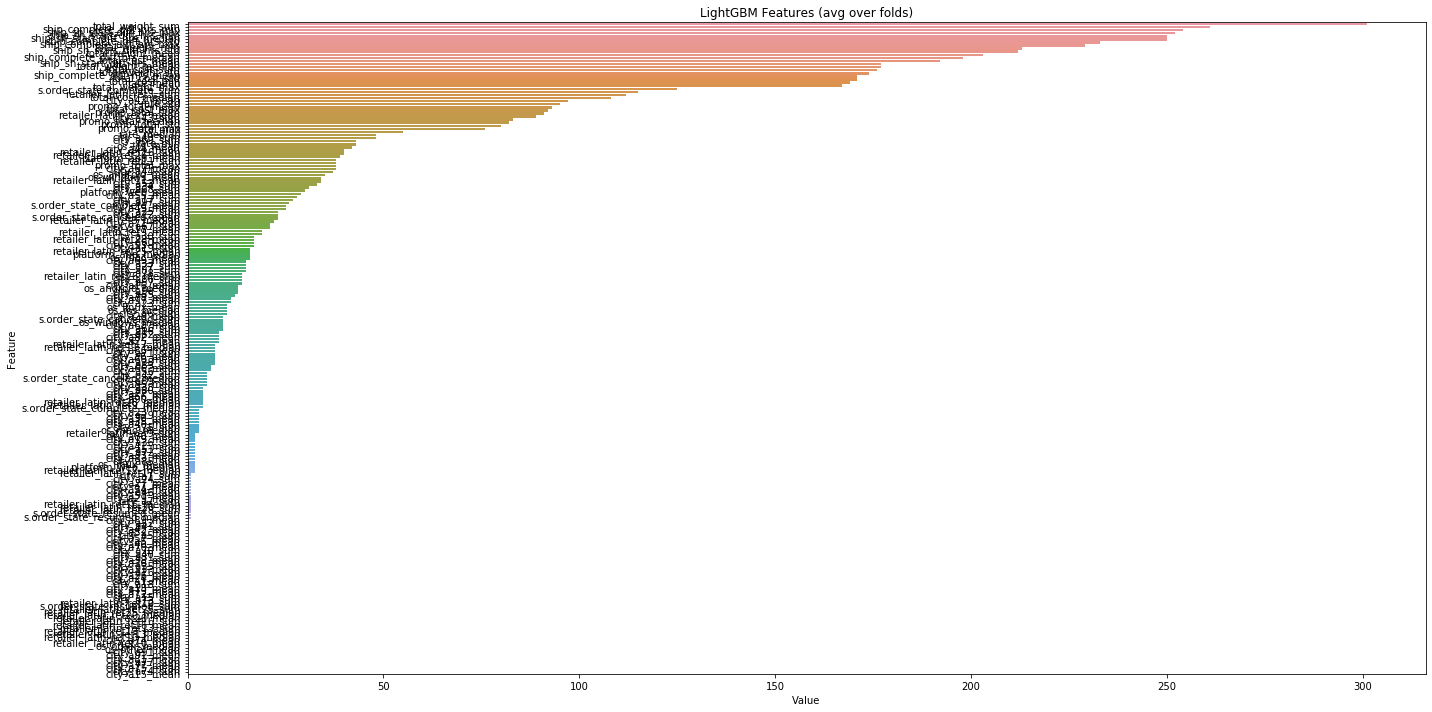

<Figure size 432x288 with 0 Axes>

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(CV_lgbm_v1.best_estimator_.feature_importances_,
                                      train2_train.loc[:,~train2_train.columns.isin(['phone_id', 'target'])].columns)),
                           columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances_v5.png')

In [144]:
data = train.loc[train['order_completed_at']=='2020-06'].merge(sh05_aggr.drop_duplicates(), 
                                                        how='inner', on='phone_id')

In [69]:
data1 = train.loc[train['order_completed_at']=='2020-01'].merge(
    sh01_aggr.drop_duplicates(), how='left', on='phone_id')

In [107]:
data2 = train.loc[train['order_completed_at']=='2020-02'].merge(
    sh02_aggr.drop_duplicates(), how='left', on='phone_id')
data2.shape

(75985, 126)

In [108]:
data3 = train.loc[train['order_completed_at']=='2020-03'].merge(
    sh03_aggr.drop_duplicates(), how='left', on='phone_id')
data3.shape

(106791, 134)

In [109]:
data4 = train.loc[train['order_completed_at']=='2020-04'].merge(
    sh04_aggr.drop_duplicates(), how='left', on='phone_id')
data4.shape

(159845, 185)

In [110]:
data5 = train.loc[train['order_completed_at']=='2020-05'].merge(
    sh05_aggr.drop_duplicates(), how='left', on='phone_id')
data5.shape

(218569, 214)

In [111]:
data6 = train.loc[train['order_completed_at']=='2020-06'].merge(
    sh06_aggr.drop_duplicates(), how='left', on='phone_id')
data6.shape

(254285, 343)

In [112]:
data7 = train.loc[train['order_completed_at']=='2020-07'].merge(
    sh07_aggr.drop_duplicates(), how='left', on='phone_id')
data7.shape

(284449, 367)

In [234]:
sam_sub = sam_sub.merge(
    sh08_aggr.drop_duplicates(), how='left', left_on = 'Id', right_on='phone_id')

In [254]:
sam_sub_orig.phone_id.nunique()

159212

In [257]:
sam_sub_orig.shape

(214609, 384)

In [260]:
sam_sub_orig = sam_sub_orig.merge(sh08_age, how='left', left_on = 'Id', right_on='phone_id')

In [113]:
data8 = train.loc[train['order_completed_at']=='2020-08'].merge(
    sh08_aggr.drop_duplicates(), how='left', on='phone_id')
data8.shape

(0, 384)

In [73]:
upf.sample(2)

,bdate,dot_pos,dot_pos3,gender,issue_dt_year,user_id,char_len,age
316177,1977-07-27,-1.000000,-1.000000,male,1977,3003104,4,43
388121,1978-05-04,-1.000000,-1.000000,female,1978,1535307,4,42


In [75]:
shipments.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs'],
      dtype='object')

In [88]:
data1.groupby(['order_completed_at']).count()

,phone_id,target,city_a17_sum,city_a17_mean,city_a19_sum,city_a19_mean,city_a22_sum,city_a22_mean,city_a25_sum,city_a25_mean,city_a27_sum,city_a27_mean,city_a28_sum,city_a28_mean,city_a33_sum,city_a33_mean,city_a34_sum,city_a34_mean,city_a43_sum,city_a43_mean,city_a44_sum,city_a44_mean,city_a49_sum,city_a49_mean,city_a53_sum,city_a53_mean,city_a55_sum,city_a55_mean,city_a60_sum,city_a60_mean,city_a66_sum,city_a66_mean,city_a67_sum,city_a67_mean,city_a68_sum,city_a68_mean,city_a69_sum,city_a69_mean,city_a83_sum,city_a83_mean,...,ship_sh_start_diff_hrs_std,rate_min,rate_max,rate_mean,rate_median,rate_std,total_weight_sum,total_weight_min,total_weight_max,total_weight_mean,total_weight_median,total_weight_std,total_cost_sum,total_cost_min,total_cost_max,total_cost_mean,total_cost_median,total_cost_std,promo_total_sum,promo_total_min,promo_total_max,promo_total_mean,promo_total_median,promo_total_std,platform_app_mean,platform_app_median,platform_web_mean,platform_web_median,os_android_mean,os_android_median,os_ios_mean,os_ios_median,os_linux_mean,os_linux_median,os_mac_mean,os_mac_median,os_other_mean,os_other_median,os_windows_mean,os_windows_median
order_completed_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,59652,59652,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,...,9986,27716,27716,27716,27716,10965,27716,27716,27716,27716,27716,10965,27716,27716,27716,27716,27716,10965,27716,27716,27716,27716,27716,10965,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716,27716


In [87]:
shipments_addr = shipments.merge(addr, how='left', left_on='ship_address_id', right_on = 'id')

In [93]:
sh01_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-01',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [114]:
sh02_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-02',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [115]:
sh03_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-03',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [117]:
sh04_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-04',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [116]:
sh05_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-05',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [118]:
sh06_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-06',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [119]:
sh07_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-07',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [120]:
sh08_age = shipments_addr.loc[shipments_addr['order_completed_at_category']=='2020-08',['age', 'gender', 'phone_id']].groupby(['phone_id']).agg(
    {'age':['min', 'max']})

In [94]:
sh01_age.columns = ["_".join(x) for x in sh01_age.columns.ravel()]

In [121]:
sh02_age.columns = ["_".join(x) for x in sh02_age.columns.ravel()]

In [122]:
sh03_age.columns = ["_".join(x) for x in sh03_age.columns.ravel()]

In [123]:
sh04_age.columns = ["_".join(x) for x in sh04_age.columns.ravel()]

In [124]:
sh05_age.columns = ["_".join(x) for x in sh05_age.columns.ravel()]

In [125]:
sh06_age.columns = ["_".join(x) for x in sh06_age.columns.ravel()]
sh07_age.columns = ["_".join(x) for x in sh07_age.columns.ravel()]
sh08_age.columns = ["_".join(x) for x in sh08_age.columns.ravel()]

In [235]:
data8.columns

Index(['order_completed_at', 'target', 'phone_id', 'city_a1_sum',
       'city_a1_mean', 'city_a2_sum', 'city_a2_mean', 'city_a3_sum',
       'city_a3_mean', 'city_a4_sum',
       ...
       'os_ios_mean', 'os_ios_median', 'os_linux_mean', 'os_linux_median',
       'os_mac_mean', 'os_mac_median', 'os_other_mean', 'os_other_median',
       'os_windows_mean', 'os_windows_median'],
      dtype='object', length=384)

In [98]:
data1 = data1.merge(sh01_age, how='left', on = 'phone_id')

In [146]:
data1.columns

Index(['phone_id', 'order_completed_at', 'target', 'city_a17_sum',
       'city_a17_mean', 'city_a19_sum', 'city_a19_mean', 'city_a22_sum',
       'city_a22_mean', 'city_a25_sum',
       ...
       'os_linux_median', 'os_mac_mean', 'os_mac_median', 'os_other_mean',
       'os_other_median', 'os_windows_mean', 'os_windows_median', 'age_min',
       'age_max', 'gender'],
      dtype='object', length=121)

In [178]:
data1 = data1.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-01')
                                       & ~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')

In [231]:
data1.loc[~data1['city_a17_sum'].isnull()].sample(5)

,phone_id,order_completed_at,target,city_a17_sum,city_a17_mean,city_a19_sum,city_a19_mean,city_a22_sum,city_a22_mean,city_a25_sum,city_a25_mean,city_a27_sum,city_a27_mean,city_a28_sum,city_a28_mean,city_a33_sum,city_a33_mean,city_a34_sum,city_a34_mean,city_a43_sum,city_a43_mean,city_a44_sum,city_a44_mean,city_a49_sum,city_a49_mean,city_a53_sum,city_a53_mean,city_a55_sum,city_a55_mean,city_a60_sum,city_a60_mean,city_a66_sum,city_a66_mean,city_a67_sum,city_a67_mean,city_a68_sum,city_a68_mean,city_a69_sum,city_a69_mean,city_a83_sum,...,rate_median,rate_std,total_weight_sum,total_weight_min,total_weight_max,total_weight_mean,total_weight_median,total_weight_std,total_cost_sum,total_cost_min,total_cost_max,total_cost_mean,total_cost_median,total_cost_std,promo_total_sum,promo_total_min,promo_total_max,promo_total_mean,promo_total_median,promo_total_std,platform_app_mean,platform_app_median,platform_web_mean,platform_web_median,os_android_mean,os_android_median,os_ios_mean,os_ios_median,os_linux_mean,os_linux_median,os_mac_mean,os_mac_median,os_other_mean,os_other_median,os_windows_mean,os_windows_median,age_min,age_max,gender_x,gender_y
25063,80414,2020-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,0.000000,15287.000000,6260.000000,9027.000000,7643.500000,7643.500000,1956.564464,256.000000,98.000000,158.000000,128.000000,128.000000,42.426407,-144.130005,-144.130005,0.000000,-72.065002,-72.065002,101.915304,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,NaN,NaN
43798,56622,2020-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.500000,3.535534,59190.000000,27150.000000,32040.000000,29595.000000,29595.000000,3457.752160,342.000000,162.000000,180.000000,171.000000,171.000000,12.727922,-150.000000,-150.000000,0.000000,-75.000000,-75.000000,106.066017,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,nan,nan,NaN,NaN
44650,57418,2020-01,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,0.707107,19516.000000,7241.000000,12275.000000,9758.000000,9758.000000,3559.575536,316.000000,158.000000,158.000000,158.000000,158.000000,0.000000,-1300.000000,-800.000000,-500.000000,-650.000000,-650.000000,212.132034,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,80.000000,female,female
39968,440216,2020-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,nan,15110.000000,15110.000000,15110.000000,15110.000000,15110.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,0.000000,0.000000,0.000000,0.000000,0.000000,nan,1.000000,1.000000,0.000000,0.000

In [496]:
# data1[data1.columns[:100]].info()

In [184]:
data2[['gender_x', 'gender_y']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75985 entries, 0 to 75985
Data columns (total 2 columns):
gender_x    1264 non-null object
gender_y    1287 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


In [182]:
data2[['gender']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75985 entries, 0 to 75984
Data columns (total 1 columns):
gender    1264 non-null object
dtypes: object(1)
memory usage: 1.2+ MB


In [183]:
data2 = data2.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-02')
                                        &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')

In [149]:
data2 = data2.merge(sh02_age, how='left', on = 'phone_id')
data2.shape

(75985, 129)

In [185]:
data3 = data3.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-03')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')


NameError: name 'data' is not defined

In [186]:
data3.shape

(106791, 138)

In [150]:
data3 = data3.merge(sh03_age, how='left', on = 'phone_id')
data3.shape

(106791, 137)

In [187]:
data4 = data4.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-04')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')

In [188]:
data4.shape

(159845, 189)

In [151]:
data4 = data4.merge(sh04_age, how='left', on = 'phone_id')
data4.shape

(159845, 188)

In [189]:
data5 = data5.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-05')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')

In [190]:
data5.shape

(218569, 218)

In [152]:
data5 = data5.merge(sh05_age, how='left', on = 'phone_id')
data5.shape

(218569, 217)

In [191]:
data6 = data6.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-06')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')
data6.shape

(254285, 347)

In [153]:
data6 = data6.merge(sh06_age, how='left', on = 'phone_id')
data6.shape

(254285, 346)

In [192]:
data7 = data7.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-07')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')
data7.shape

(284449, 371)

In [ ]:
data7 = data7.merge(shipments_addr.loc[(shipments_addr['order_completed_at_category']=='2020-07')
                                       &~(shipments_addr['gender'].isnull()),
                               ['gender', 'phone_id']].drop_duplicates(),
           how='left', on = 'phone_id').drop_duplicates(subset = ['phone_id'], keep='last')
data7.shape

In [154]:
data7 = data7.merge(sh07_age, how='left', on = 'phone_id')
data7.shape

(284449, 370)

In [134]:
data1.shape,data2.shape, data3.shape, data4.shape, data5.shape, data6.shape, data7.shape

((59652, 121),
 (75985, 127),
 (106791, 135),
 (159845, 186),
 (218569, 215),
 (254285, 344),
 (284449, 368))

In [145]:
data6.columns

Index(['phone_id', 'order_completed_at', 'target', 'city_a1_sum',
       'city_a1_mean', 'city_a2_sum', 'city_a2_mean', 'city_a3_sum',
       'city_a3_mean', 'city_a4_sum',
       ...
       'os_ios_median', 'os_linux_mean', 'os_linux_median', 'os_mac_mean',
       'os_mac_median', 'os_other_mean', 'os_other_median', 'os_windows_mean',
       'os_windows_median', 'gender'],
      dtype='object', length=344)

In [193]:
train_total = pd.concat([data1.loc[~data1['city_a17_sum'].isnull()].reset_index(drop=True), 
                         data2.loc[~data1['city_a17_sum'].isnull()].reset_index(drop=True), 
  data3.reset_index(drop=True), data4.reset_index(drop=True), 
  data5.reset_index(drop=True), data6.reset_index(drop=True), 
  data7.reset_index(drop=True)])

/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [196]:
train_total = train_total.loc[:, train_total.columns!='gender_x']

In [197]:
train_total.shape, data7.shape

((1159576, 370), (284449, 371))

In [158]:
train_total.to_csv('train_total.csv', sep=',')

In [162]:
train_total.groupby(['target']).count()

,age_max,age_min,city_a10_mean,city_a10_sum,city_a12_mean,city_a12_sum,city_a13_mean,city_a13_sum,city_a14_mean,city_a14_sum,city_a15_mean,city_a15_sum,city_a16_mean,city_a16_sum,city_a17_mean,city_a17_sum,city_a18_mean,city_a18_sum,city_a19_mean,city_a19_sum,city_a1_mean,city_a1_sum,city_a20_mean,city_a20_sum,city_a21_mean,city_a21_sum,city_a22_mean,city_a22_sum,city_a23_mean,city_a23_sum,city_a24_mean,city_a24_sum,city_a25_mean,city_a25_sum,city_a26_mean,city_a26_sum,city_a27_mean,city_a27_sum,city_a28_mean,city_a28_sum,...,retailer_latin_ret6_mean,retailer_latin_ret6_median,retailer_latin_ret6_sum,retailer_latin_ret8_mean,retailer_latin_ret8_median,retailer_latin_ret8_sum,retailer_latin_ret9_mean,retailer_latin_ret9_median,retailer_latin_ret9_sum,s.order_state_canceled_mean,s.order_state_canceled_median,s.order_state_canceled_sum,s.order_state_complete_mean,s.order_state_complete_median,s.order_state_complete_sum,s.order_state_resumed_mean,s.order_state_resumed_median,s.order_state_resumed_sum,ship_complete_diff_hrs_max,ship_complete_diff_hrs_mean,ship_complete_diff_hrs_median,ship_complete_diff_hrs_min,ship_complete_diff_hrs_std,ship_sh_start_diff_hrs_max,ship_sh_start_diff_hrs_mean,ship_sh_start_diff_hrs_median,ship_sh_start_diff_hrs_min,ship_sh_start_diff_hrs_std,total_cost_max,total_cost_mean,total_cost_median,total_cost_min,total_cost_std,total_cost_sum,total_weight_max,total_weight_mean,total_weight_median,total_weight_min,total_weight_std,total_weight_sum
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,6416,6416,113072,113072,113072,113072,113072,113072,113072,113072,166395,166395,231971,231971,243314,243314,191806,191806,243314,243314,191806,191806,113072,113072,56787,56787,243314,243314,191806,191806,191806,191806,243314,243314,166395,166395,243314,243314,243314,243314,...,56787,56787,56787,113072,113072,113072,243314,243314,243314,243314,243314,243314,243314,243314,243314,243314,243314,243314,240269,240269,240269,240269,70932,240269,240269,240269,240269,70932,243314,243314,243314,243314,79093,243314,243314,243314,243314,243314,79093,243314
1.000000,14600,14600,199791,199791,199791,199791,199791,199791,199791,199791,300905,300905,433086,433086,449459,449459,373346,373346,449459,449459,373346,373346,199791,199791,100494,100494,449459,449459,373346,373346,373346,373346,449459,449459,300905,300905,449459,449459,449459,449459,...,100494,100494,100494,199791,199791,199791,449459,449459,449459,449459,449459,449459,449459,449459,449459,449459,449459,449459,447204,447204,447204,447204,264408,447204,447204,447204,447204,264408,449459,449459,449459,449459,273910,449459,449459,449459,449459,449459,273910,449459


In [163]:
gc.collect()

40

In [143]:
train.loc[train['order_completed_at']=='2020-07'].groupby(['target']).count()

,phone_id,order_completed_at
target,,
0.000000,151807,151807
1.000000,132642,132642


In [141]:
data7.groupby(['target']).count()

,phone_id,order_completed_at,city_a1_sum,city_a1_mean,city_a2_sum,city_a2_mean,city_a3_sum,city_a3_mean,city_a4_sum,city_a4_mean,city_a5_sum,city_a5_mean,city_a6_sum,city_a6_mean,city_a7_sum,city_a7_mean,city_a10_sum,city_a10_mean,city_a12_sum,city_a12_mean,city_a13_sum,city_a13_mean,city_a14_sum,city_a14_mean,city_a15_sum,city_a15_mean,city_a16_sum,city_a16_mean,city_a17_sum,city_a17_mean,city_a18_sum,city_a18_mean,city_a19_sum,city_a19_mean,city_a20_sum,city_a20_mean,city_a21_sum,city_a21_mean,city_a22_sum,city_a22_mean,...,rate_min,rate_max,rate_mean,rate_median,rate_std,total_weight_sum,total_weight_min,total_weight_max,total_weight_mean,total_weight_median,total_weight_std,total_cost_sum,total_cost_min,total_cost_max,total_cost_mean,total_cost_median,total_cost_std,promo_total_sum,promo_total_min,promo_total_max,promo_total_mean,promo_total_median,promo_total_std,platform_app_mean,platform_app_median,platform_web_mean,platform_web_median,os_android_mean,os_android_median,os_ios_mean,os_ios_median,os_linux_mean,os_linux_median,os_mac_mean,os_mac_median,os_other_mean,os_other_median,os_windows_mean,os_windows_median,gender
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,151807,151807,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,...,56787,56787,56787,56787,18789,56787,56787,56787,56787,56787,18789,56787,56787,56787,56787,56787,18789,56787,56787,56787,56787,56787,18789,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,56787,2230
1.000000,132642,132642,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,...,100494,100494,100494,100494,63709,100494,100494,100494,100494,100494,63709,100494,100494,100494,100494,100494,63709,100494,100494,100494,100494,100494,63709,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,100494,4763


In [105]:
data1.groupby(['target']).count()

,phone_id,order_completed_at,city_a17_sum,city_a17_mean,city_a19_sum,city_a19_mean,city_a22_sum,city_a22_mean,city_a25_sum,city_a25_mean,city_a27_sum,city_a27_mean,city_a28_sum,city_a28_mean,city_a33_sum,city_a33_mean,city_a34_sum,city_a34_mean,city_a43_sum,city_a43_mean,city_a44_sum,city_a44_mean,city_a49_sum,city_a49_mean,city_a53_sum,city_a53_mean,city_a55_sum,city_a55_mean,city_a60_sum,city_a60_mean,city_a66_sum,city_a66_mean,city_a67_sum,city_a67_mean,city_a68_sum,city_a68_mean,city_a69_sum,city_a69_mean,city_a83_sum,city_a83_mean,...,rate_mean,rate_median,rate_std,total_weight_sum,total_weight_min,total_weight_max,total_weight_mean,total_weight_median,total_weight_std,total_cost_sum,total_cost_min,total_cost_max,total_cost_mean,total_cost_median,total_cost_std,promo_total_sum,promo_total_min,promo_total_max,promo_total_mean,promo_total_median,promo_total_std,platform_app_mean,platform_app_median,platform_web_mean,platform_web_median,os_android_mean,os_android_median,os_ios_mean,os_ios_median,os_linux_mean,os_linux_median,os_mac_mean,os_mac_median,os_other_mean,os_other_median,os_windows_mean,os_windows_median,age_min,age_max,gender
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,37045,37045,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,...,11343,11343,2538,11343,11343,11343,11343,11343,2538,11343,11343,11343,11343,11343,2538,11343,11343,11343,11343,11343,2538,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,11343,277,277,361
1.000000,22607,22607,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,...,16373,16373,8427,16373,16373,16373,16373,16373,8427,16373,16373,16373,16373,16373,8427,16373,16373,16373,16373,16373,8427,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,16373,411,411,541


In [173]:
data1 = train.loc[train['order_completed_at']=='2020-05'].merge(sh05_aggr.drop_duplicates(), 
                                                        how='inner', on='phone_id')

In [207]:
shipments.columns

Index(['user_id', 'ship_address_id', 'shipment_id', 'order_id',
       'order_created_at', 'order_completed_at', 'shipment_starts_at',
       'retailer', 's.order_state', 'shipment_state', 's.city_name',
       's.store_id', 'total_cost', 'rate', 'dw_kind', 'promo_total',
       'total_weight', 'platform', 'os', 'shipped_at',
       'order_completed_at_category', 'ship_complete_diff_hrs',
       'ship_sh_start_diff_hrs', 'city', 'retailer_latin'],
      dtype='object')

In [209]:
sam_sub.columns

Index(['Id', 'Predicted'], dtype='object')

In [232]:
sam_sub.shape

(214609, 2)

In [225]:
data2 = sam_sub.merge(sh08_aggr.drop_duplicates(), how='left', left_on='Id', right_on = 'phone_id')

In [67]:
# sh08_aggr.to_csv('sh08_aggr.csv', sep='|')
sh01_aggr = pd.read_csv('sh01_aggr.csv', sep='|')
sh02_aggr = pd.read_csv('sh02_aggr.csv', sep='|')
sh03_aggr = pd.read_csv('sh03_aggr.csv', sep='|')
sh04_aggr = pd.read_csv('sh04_aggr.csv', sep='|')
sh05_aggr = pd.read_csv('sh05_aggr.csv', sep='|')
sh06_aggr = pd.read_csv('sh06_aggr.csv', sep='|')
sh07_aggr = pd.read_csv('sh07_aggr.csv', sep='|')
sh08_aggr = pd.read_csv('sh08_aggr.csv', sep='|')

In [68]:
sh01_aggr.shape, sh02_aggr.shape,sh03_aggr.shape, sh04_aggr.shape,sh05_aggr.shape, sh06_aggr.shape,sh07_aggr.shape, sh08_aggr.shape,

((37659, 116),
 (48312, 124),
 (90313, 132),
 (137913, 183),
 (214989, 212),
 (200865, 341),
 (207294, 365),
 (218439, 382))

In [452]:
# sh07_aggr.to_csv('sh07_aggr.csv', sep='|')

In [453]:
# sh06_aggr.to_csv('sh06_aggr.csv', sep='|')

In [454]:
# sh05_aggr.to_csv('sh05_aggr.csv', sep='|')

In [455]:
# sh04_aggr.to_csv('sh04_aggr.csv', sep='|')

In [456]:
# sh03_aggr.to_csv('sh03_aggr.csv', sep='|')

In [ ]:
# sh02_aggr.to_csv('sh02_aggr.csv', sep='|')

In [ ]:
# sh01_aggr.to_csv('sh01_aggr.csv', sep='|')

In [211]:
data2.shape

(159207, 287)

In [ ]:
sub_data = train.loc[train['order_completed_at']=='2020-05'].merge(sh05_aggr.drop_duplicates(), 
                                                        how='inner', on='phone_id')

In [224]:
data2[train2_test.columns.tolist()[2:]].shape

(159207, 211)

In [165]:
train_total['order_completed_at'].nunique()

7

In [202]:
train_total = train_total.loc[:, train_total.columns!='gender_y']

In [ ]:
train_total.loc[train_total['city']]

In [203]:
train_total.shape

(1159576, 369)

In [201]:
# train_total.loc[train_total['gender'].isnull()].groupby(['age_min']).count()

In [238]:
train2_train.target.nunique()

2

In [239]:
train2_train.columns

Index(['age_max', 'age_min', 'city_a10_mean', 'city_a10_sum', 'city_a12_mean',
       'city_a12_sum', 'city_a13_mean', 'city_a13_sum', 'city_a14_mean',
       'city_a14_sum',
       ...
       'total_cost_median', 'total_cost_min', 'total_cost_std',
       'total_cost_sum', 'total_weight_max', 'total_weight_mean',
       'total_weight_median', 'total_weight_min', 'total_weight_std',
       'total_weight_sum'],
      dtype='object', length=368)

In [ ]:
train_total['gender_new'] = train_total['gender_new']

In [204]:
train2_train, train2_test, y_train, y_test = train_test_split(
    train_total.loc[:, train_total.columns!='order_completed_at'], train_total['target'],  test_size=0.1, 
    stratify = train_total['target'],random_state=42)
print(train2_train.shape, train2_test.shape)

(1043618, 368) (115958, 368)


In [461]:
train2_train, train2_test, y_train, y_test = train_test_split(
    train_new2.loc[:, ~train_new2.columns.isin(['order_completed_at',
                                              'order_completed_at_category'])], train_new2['target'],  test_size=0.1, 
    stratify = train_new2['target'],random_state=42)
print(train2_train.shape, train2_test.shape)

(623495, 99) (69278, 99)


In [462]:
train2_train.columns

Index(['ship_complete_diff_hrs_min', 'total_weight_min',
       'ship_complete_diff_hrs_std', 'total_weight_sum',
       'ship_sh_start_diff_hrs_min', 'total_weight_max', 'total_cost_std',
       'ship_sh_start_diff_hrs_std', 'total_weight_median', 'total_cost_mean',
       'ship_complete_diff_hrs_median', 'total_weight_std',
       'ship_complete_diff_hrs_max', 'ship_sh_start_diff_hrs_max',
       'ship_complete_diff_hrs_mean', 'rate_mean', 'total_cost_sum',
       'total_weight_mean', 'total_cost_min', 'ship_sh_start_diff_hrs_median',
       'ship_sh_start_diff_hrs_mean', 's.order_state_complete_sum',
       'total_cost_median', 'promo_total_min', 'promo_total_std', 'rate_std',
       'retailer_latin_ret3_mean', 'promo_total_mean',
       'retailer_latin_ret3_sum', 'total_cost_max', 'promo_total_sum',
       'promo_total_median', 'rate_median', 'retailer_latin_ret26_mean',
       'rate_max', 'city_a43_mean', 'age_max', 'platform_app_mean',
       'retailer_latin_ret11_mean', 'rate_mi

In [ ]:
train2_train, train2_test, y_train, y_test = train_test_split(
    train_new2.loc[:, train_new2.columns!='order_completed_at'], train_new2['target'],  test_size=0.1, 
    stratify = train_new2['target'],random_state=42)
print(train2_train.shape, train2_test.shape)

In [469]:
# train2_train[train2_train.columns[:100]].info()

In [470]:
# train2_train.columns[200:300]

In [216]:
from sklearn.preprocessing import StandardScaler#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_total.loc[:,~train_total.columns.isin(['phone_id', 'target', 'order_completed_at'])], y_train)
scaled_train_data = scaler.transform(train2_train.loc[:,~train2_train.columns.isin(['phone_id', 'target'])])
scaled_test_data = scaler.transform(train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])])

In [463]:
from sklearn.preprocessing import StandardScaler#создаем стандартный scaler
scaler = StandardScaler()
scaler.fit(train_new2.loc[:,~train_new2.columns.isin(['phone_id', 'target', 'order_completed_at', 
                                                     'order_completed_at_category'])], y_train)
scaled_train_data_new = scaler.transform(train2_train.loc[:,~train2_train.columns.isin(['phone_id', 'target'])])
scaled_test_data_new = scaler.transform(train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])])

/home/satbekova/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/satbekova/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/satbekova/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count
/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
/home/satbekova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 

In [464]:
scaled_test_data_new.shape

(69278, 97)

In [407]:
# train2_test.order_completed_at.nunique()

In [408]:
scaled_test_data_new.shape, scaled_train_data_new.shape

((69278, 83), (623495, 83))

In [ ]:
train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].columns

In [ ]:
train2_test.phone_id.nunique()

In [ ]:
sam_sub = sam_sub_orig

In [240]:
sam_sub_orig = sam_sub

In [249]:
sam_sub.columns

Index(['city_a1_sum', 'city_a1_mean', 'city_a2_sum', 'city_a2_mean',
       'city_a3_sum', 'city_a3_mean', 'city_a4_sum', 'city_a4_mean',
       'city_a5_sum', 'city_a5_mean',
       ...
       'os_ios_mean', 'os_ios_median', 'os_linux_mean', 'os_linux_median',
       'os_mac_mean', 'os_mac_median', 'os_other_mean', 'os_other_median',
       'os_windows_mean', 'os_windows_median'],
      dtype='object', length=381)

In [264]:
sam_sub[train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].columns.tolist()].shape

(214609, 366)

In [280]:
train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].sample(2).to_csv('CV_v2_scaled_order.csv', sep='|')

In [410]:
train2_test.columns

Index(['ship_complete_diff_hrs_min', 'total_weight_min',
       'ship_complete_diff_hrs_std', 'total_weight_sum',
       'ship_sh_start_diff_hrs_min', 'total_weight_max', 'total_cost_std',
       'ship_sh_start_diff_hrs_std', 'total_weight_median', 'total_cost_mean',
       'ship_complete_diff_hrs_median', 'total_weight_std',
       'ship_complete_diff_hrs_max', 'ship_sh_start_diff_hrs_max',
       'ship_complete_diff_hrs_mean', 'rate_mean', 'total_cost_sum',
       'total_weight_mean', 'total_cost_min', 'ship_sh_start_diff_hrs_median',
       'ship_sh_start_diff_hrs_mean', 's.order_state_complete_sum',
       'total_cost_median', 'promo_total_min', 'promo_total_std', 'rate_std',
       'retailer_latin_ret3_mean', 'promo_total_mean',
       'retailer_latin_ret3_sum', 'total_cost_max', 'promo_total_sum',
       'promo_total_median', 'rate_median', 'retailer_latin_ret26_mean',
       'rate_max', 'city_a43_mean', 'age_max', 'platform_app_mean',
       'retailer_latin_ret11_mean', 'rate_mi

In [265]:
sam_sub.shape

(214609, 383)

In [263]:
sam_sub = sam_sub.loc[:, ~sam_sub.columns.isin(['Id', 'Predicted', 'phone_id', ])]

In [266]:
sam_data_scaled = scaler.transform(sam_sub[train2_test.loc[:,~train2_test.columns.isin(['phone_id', 'target'])].columns.tolist()])

In [267]:
sam_data_scaled.shape

(214609, 366)

In [176]:
data1.groupby(['target']).count()

,phone_id,order_completed_at,city_a1_sum,city_a1_mean,city_a5_sum,city_a5_mean,city_a6_sum,city_a6_mean,city_a7_sum,city_a7_mean,city_a15_sum,city_a15_mean,city_a16_sum,city_a16_mean,city_a17_sum,city_a17_mean,city_a18_sum,city_a18_mean,city_a19_sum,city_a19_mean,city_a22_sum,city_a22_mean,city_a23_sum,city_a23_mean,city_a24_sum,city_a24_mean,city_a25_sum,city_a25_mean,city_a26_sum,city_a26_mean,city_a27_sum,city_a27_mean,city_a28_sum,city_a28_mean,city_a29_sum,city_a29_mean,city_a30_sum,city_a30_mean,city_a31_sum,city_a31_mean,...,ship_sh_start_diff_hrs_std,rate_min,rate_max,rate_mean,rate_median,rate_std,total_weight_sum,total_weight_min,total_weight_max,total_weight_mean,total_weight_median,total_weight_std,total_cost_sum,total_cost_min,total_cost_max,total_cost_mean,total_cost_median,total_cost_std,promo_total_sum,promo_total_min,promo_total_max,promo_total_mean,promo_total_median,promo_total_std,platform_app_mean,platform_app_median,platform_web_mean,platform_web_median,os_android_mean,os_android_median,os_ios_mean,os_ios_median,os_linux_mean,os_linux_median,os_mac_mean,os_mac_median,os_other_mean,os_other_median,os_windows_mean,os_windows_median
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,...,18058,53323,53323,53323,53323,19424,53323,53323,53323,53323,53323,19424,53323,53323,53323,53323,53323,19424,53323,53323,53323,53323,53323,19424,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323,53323
1.000000,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,...,65373,101114,101114,101114,101114,66887,101114,101114,101114,101114,101114,66887,101114,101114,101114,101114,101114,66887,101114,101114,101114,101114,101114,66887,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114,101114


In [153]:
# train2_train.columns

In [293]:
messages = pd.read_csv("/data/satbekova/дата мак/messages/messages.csv", sep=',')

In [284]:
actions = pd.read_csv("/data/satbekova/дата мак/messages/actions.csv", sep=',')

In [294]:
messages = messages.merge(actions.rename(columns={"id":"action_id"}), "inner", on="action_id")

In [295]:
messages.sample(2)

,sent,action_id,user_id,subject,body,type
9675006,1595348335.000000,2124.000000,1485602,Можете заказать в 1 из любимых магазинов 💚,Выбирайте {{customer.retailer_string}},push
3291899,1593530142.000000,1923.000000,1736692,Можете заказать в 1 из любимых магазинов 💚,Выбирайте {{customer.retailer_string}},push


In [296]:
%%time
import datetime
# if you need merge actions to message
#messages = messages.merge(actions.rename(columns={"id":"action_id"}), "inner", on="action_id")
# user_dict - dict there are phone_id and user_id
user_dict = pd.read_csv("/data/satbekova/дата мак/user_id_and_phone_id.csv")
messages = messages.merge(user_dict, "inner", on="user_id")

CPU times: user 2.93 s, sys: 412 ms, total: 3.34 s
Wall time: 3.34 s


In [297]:
user_dict.sample(2)

,Unnamed: 0,phone_id,user_id
20912,99845,169913,1852085
25722,124393,322733,707870


In [298]:
messages.sample(5)

,sent,action_id,user_id,subject,body,type,Unnamed: 0,phone_id
5086744,1598697131.000000,2835.000000,1277459,NaN,NaN,push,493018,108323
5812572,1592487571.000000,1838.000000,371769,Теперь заказывать стало проще!,Мы открыли ещё два магазина ЛЕНТА в нашем городе🎉 Вперед за покупками!,push,436853,56807
3249656,1591011429.000000,1777.000000,252515,Теперь заказывать стало проще!,Мы открыли ещё два магазина ЛЕНТА в нашем городе🎉 Вперед за покупками!,push,1176134,80398
1735933,1587651774.000000,1538.000000,908130,Теперь заказывать стало проще!,Мы открыли ещё два магазина ЛЕНТА в нашем городе🎉 Вперед за покупками!,push,1240790,69547
10859934,1596715291.000000,2455.000000,2379401,"Дешевле, чем на полке🚀 Посмотрите!","Заходите в каталог любимого ритейлера, открывайте раздел «Дешевле, чем на полке», заказывайте товары по самым выгодным ценам",push,248644,526338


In [300]:
def change_datetime(timestamp):
    value = datetime.datetime.fromtimestamp(timestamp)
    return value.strftime('%Y-%m-%d %H:%M:%S')

In [299]:
messages.shape

(12017784, 8)

In [301]:
# change data format
messages['date_time'] = messages.sent.map(change_datetime)

In [303]:
gc.collect()

20

In [304]:
#new columns year and month
messages['date_time_month'] = [str(i)[:7] for i in messages['date_time']]

In [305]:
messages.sample(5)

,sent,action_id,user_id,subject,body,type,Unnamed: 0,phone_id,date_time,date_time_month
692079,1595348358.000000,2124.000000,1491481,Можете заказать в 1 из любимых магазинов 💚,Выбирайте {{customer.retailer_string}},push,570832,115768,2020-07-21 22:19:18,2020-07
2037230,1590902955.000000,1512.000000,2016133,Сегодня готовим брауни с M&M's 😋 Приступим?,Видео рецепт и все необходимые ингредиенты уже ждут вас,email,1139212,46537,2020-05-31 11:29:15,2020-05
4831198,1594990756.000000,2088.000000,1595740,NaN,NaN,push,498961,445057,2020-07-17 18:59:16,2020-07
2451397,1594311333.000000,1992.000000,788805,Все необходимые товары для самых маленьких уже здесь🤗,Скидки ждут вас!,email,1290513,44700,2020-07-09 22:15:33,2020-07
4842274,1591551067.000000,1011.000000,2084334,"Закажите продукты в СберМаркете, а мы привезем тяжелые пакеты за Вас!",1-ая доставка всего за 98 рублей,email,1281066,188828,2020-06-07 23:31:07,2020-06


In [467]:
sam_sub.shape

(214609, 383)

In [335]:
messages_new = messages.groupby(['phone_id','date_time_month', 'type']).agg({'type':['count']})

In [338]:
messages_new = messages_new.reset_index()

In [340]:
messages_new.sample(2)

,phone_id,date_time_month,type,type_count
1067992,247652,2020-07,push,24
661746,132649,2020-05,push,16


In [314]:
messages_new = messages_new[['phone_id', 'date_time_month', 'type', 'count']]

In [345]:
train_total[['phone_id', 'order_completed_at']].shape

(1159576, 2)

In [347]:
train_total.loc[~train_total['city_a17_sum'].isnull()].shape

(692773, 369)

In [351]:
train_new = train_total.loc[~train_total['city_a17_sum'].isnull()].merge(
    messages_new.loc[messages_new['type']=='email'], 
    how='left', left_on = ['phone_id', 'order_completed_at'], right_on = ['phone_id', 'date_time_month']
).merge(
    messages_new.loc[messages_new['type']=='push'], 
    how='left', left_on = ['phone_id', 'order_completed_at'], right_on = ['phone_id', 'date_time_month']
).merge(
    messages_new.loc[messages_new['type']=='sms'], 
    how='left', left_on = ['phone_id', 'order_completed_at'], right_on = ['phone_id', 'date_time_month']
)

In [353]:
train_new.sample(5)

,age_max,age_min,city_a10_mean,city_a10_sum,city_a12_mean,city_a12_sum,city_a13_mean,city_a13_sum,city_a14_mean,city_a14_sum,city_a15_mean,city_a15_sum,city_a16_mean,city_a16_sum,city_a17_mean,city_a17_sum,city_a18_mean,city_a18_sum,city_a19_mean,city_a19_sum,city_a1_mean,city_a1_sum,city_a20_mean,city_a20_sum,city_a21_mean,city_a21_sum,city_a22_mean,city_a22_sum,city_a23_mean,city_a23_sum,city_a24_mean,city_a24_sum,city_a25_mean,city_a25_sum,city_a26_mean,city_a26_sum,city_a27_mean,city_a27_sum,city_a28_mean,city_a28_sum,...,s.order_state_canceled_median,s.order_state_canceled_sum,s.order_state_complete_mean,s.order_state_complete_median,s.order_state_complete_sum,s.order_state_resumed_mean,s.order_state_resumed_median,s.order_state_resumed_sum,ship_complete_diff_hrs_max,ship_complete_diff_hrs_mean,ship_complete_diff_hrs_median,ship_complete_diff_hrs_min,ship_complete_diff_hrs_std,ship_sh_start_diff_hrs_max,ship_sh_start_diff_hrs_mean,ship_sh_start_diff_hrs_median,ship_sh_start_diff_hrs_min,ship_sh_start_diff_hrs_std,target,total_cost_max,total_cost_mean,total_cost_median,total_cost_min,total_cost_std,total_cost_sum,total_weight_max,total_weight_mean,total_weight_median,total_weight_min,total_weight_std,total_weight_sum,date_time_month_x,type_x,type_count_x,date_time_month_y,type_y,type_count_y,date_time_month,type,type_count
181339,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,13.888889,11.158333,11.158333,8.427778,3.861589,3.095278,2.030000,2.030000,0.964722,1.506530,1.000000,199.000000,149.000000,149.000000,99.000000,70.710678,298.000000,25270.000000,20401.000000,20401.000000,15532.000000,6885.805835,40802.000000,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan
420397,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.884722,9.884722,9.884722,9.884722,nan,0.911944,0.911944,0.911944,0.911944,nan,0.000000,158.000000,158.000000,158.000000,158.000000,nan,158.000000,7213.000000,7213.000000,7213.000000,7213.000000,nan,7213.000000,NaN,NaN,nan,2020-06,push,9.000000,NaN,NaN,nan
295977,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,nan,nan,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.289444,2.289444,2.289444,2.289444,nan,0.391389,0.391389,0.391389,0.391389,nan,1.000000,99.000000,99.000000,99.000000,99.000000,nan,99.000000,10943.000000,10943.000000,10943.000000,10943.000000,nan,10943.000000,2020-05,email,1.000000,2020-05,push,15.000000,NaN,NaN,nan
175876,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,nan,nan,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,nan,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,16.315833,10.335648,10.861944,3.829167,6.259948,1.923611,1.561389,1.853333,0.907222,0.567614,1.000000,158.000000,158.000000,158.000000,158.000000,0.000000,474.000000,14651.000000,9091.000000,8912.000000,3710.000000,5472.695954,27273.000000,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan
568112,nan,nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [354]:
train_new = train_new.loc[:, ~train_new.columns.isin(['date_time_month_x', 'type_x', 'date_time_month_y', 'type_y', 'date_time_month',
       'type',])]

In [357]:
train_new.to_csv('train_new.csv', sep='|')

In [322]:
messages_new.groupby(['type']).count()

,type_count
type,
email,554742
push,1023730
sms,60582


In [319]:
messages_new.sample(2)

,,,type
,,,count
phone_id,date_time_month,type,
124779,2020-06,push,4
601063,2020-04,push,8


In [337]:
messages_new.columns = ["_".join(x) for x in messages_new.columns.ravel()]

In [323]:
messages_new2 = messages.groupby(['phone_id','date_time_month']).agg({'type':['count']})

In [328]:
messages_new.columns

Index(['type_count'], dtype='object')

In [342]:
train_total.shape

(1159576, 369)

In [341]:
messages_new.loc[messages_new['type']=='email'].shape

(554742, 4)

In [282]:
train_total.loc[~train_total['city_a17_sum'].isnull()].shape

(692773, 369)

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
param_grid = {
#             'learning_rate':  [0.01, 0.05], 
            'n_estimators': [250, 500],
            'random_state': [123],
            'n_jobs': [-1],
#             'silent': [False],
#             'objective': ['binary'],
#             'max_bin': ['128'],
#             'feature_fraction': [0.5],
            'max_depth': [25, 50]
}

In [413]:
param_grid = {
            'learning_rate':  [0.05], 
            'n_estimators': [500],
            'random_state': [123],
            'n_jobs': [-1],
            'silent': [False],
            'objective': ['binary'],
            'max_bin': ['128'],
            'feature_fraction': [0.5],
            'max_depth': [25, 50]
}

In [171]:
train2_train.groupby(['gender']).count()

,age_max,age_min,city_a10_mean,city_a10_sum,city_a12_mean,city_a12_sum,city_a13_mean,city_a13_sum,city_a14_mean,city_a14_sum,city_a15_mean,city_a15_sum,city_a16_mean,city_a16_sum,city_a17_mean,city_a17_sum,city_a18_mean,city_a18_sum,city_a19_mean,city_a19_sum,city_a1_mean,city_a1_sum,city_a20_mean,city_a20_sum,city_a21_mean,city_a21_sum,city_a22_mean,city_a22_sum,city_a23_mean,city_a23_sum,city_a24_mean,city_a24_sum,city_a25_mean,city_a25_sum,city_a26_mean,city_a26_sum,city_a27_mean,city_a27_sum,city_a28_mean,city_a28_sum,...,retailer_latin_ret6_median,retailer_latin_ret6_sum,retailer_latin_ret8_mean,retailer_latin_ret8_median,retailer_latin_ret8_sum,retailer_latin_ret9_mean,retailer_latin_ret9_median,retailer_latin_ret9_sum,s.order_state_canceled_mean,s.order_state_canceled_median,s.order_state_canceled_sum,s.order_state_complete_mean,s.order_state_complete_median,s.order_state_complete_sum,s.order_state_resumed_mean,s.order_state_resumed_median,s.order_state_resumed_sum,ship_complete_diff_hrs_max,ship_complete_diff_hrs_mean,ship_complete_diff_hrs_median,ship_complete_diff_hrs_min,ship_complete_diff_hrs_std,ship_sh_start_diff_hrs_max,ship_sh_start_diff_hrs_mean,ship_sh_start_diff_hrs_median,ship_sh_start_diff_hrs_min,ship_sh_start_diff_hrs_std,target,total_cost_max,total_cost_mean,total_cost_median,total_cost_min,total_cost_std,total_cost_sum,total_weight_max,total_weight_mean,total_weight_median,total_weight_min,total_weight_std,total_weight_sum
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,11289,11289,7358,7358,7358,7358,7358,7358,7358,7358,10642,10642,14638,14638,15155,15155,12696,12696,15155,15155,12696,12696,7358,7358,3768,3768,15155,15155,12696,12696,12696,12696,15155,15155,10642,10642,15155,15155,15155,15155,...,3768,3768,7358,7358,7358,15155,15155,15155,15155,15155,15155,15155,15155,15155,15155,15155,15155,15047,15047,15047,15047,8010,15047,15047,15047,15047,8010,15155,15155,15155,15155,15155,8405,15155,15155,15155,15155,15155,8405,15155
male,7171,7171,4900,4900,4900,4900,4900,4900,4900,4900,7095,7095,9506,9506,9800,9800,8444,8444,9800,9800,8444,8444,4900,4900,2524,2524,9800,9800,8444,8444,8444,8444,9800,9800,7095,7095,9800,9800,9800,9800,...,2524,2524,4900,4900,4900,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9742,9742,9742,9742,5276,9742,9742,9742,9742,5276,9800,9800,9800,9800,9800,5480,9800,9800,9800,9800,9800,5480,9800


In [173]:
train2_train[['age_max', 'gender']].sample(3)

,age_max,gender
39310,nan,NaN
71099,nan,NaN
164504,nan,NaN


In [174]:
train2_train.columns

Index(['age_max', 'age_min', 'city_a10_mean', 'city_a10_sum', 'city_a12_mean',
       'city_a12_sum', 'city_a13_mean', 'city_a13_sum', 'city_a14_mean',
       'city_a14_sum',
       ...
       'total_cost_median', 'total_cost_min', 'total_cost_std',
       'total_cost_sum', 'total_weight_max', 'total_weight_mean',
       'total_weight_median', 'total_weight_min', 'total_weight_std',
       'total_weight_sum'],
      dtype='object', length=369)

In [200]:
train_total.groupby(['gender_y']).count()

,age_max,age_min,city_a10_mean,city_a10_sum,city_a12_mean,city_a12_sum,city_a13_mean,city_a13_sum,city_a14_mean,city_a14_sum,city_a15_mean,city_a15_sum,city_a16_mean,city_a16_sum,city_a17_mean,city_a17_sum,city_a18_mean,city_a18_sum,city_a19_mean,city_a19_sum,city_a1_mean,city_a1_sum,city_a20_mean,city_a20_sum,city_a21_mean,city_a21_sum,city_a22_mean,city_a22_sum,city_a23_mean,city_a23_sum,city_a24_mean,city_a24_sum,city_a25_mean,city_a25_sum,city_a26_mean,city_a26_sum,city_a27_mean,city_a27_sum,city_a28_mean,city_a28_sum,...,retailer_latin_ret6_median,retailer_latin_ret6_sum,retailer_latin_ret8_mean,retailer_latin_ret8_median,retailer_latin_ret8_sum,retailer_latin_ret9_mean,retailer_latin_ret9_median,retailer_latin_ret9_sum,s.order_state_canceled_mean,s.order_state_canceled_median,s.order_state_canceled_sum,s.order_state_complete_mean,s.order_state_complete_median,s.order_state_complete_sum,s.order_state_resumed_mean,s.order_state_resumed_median,s.order_state_resumed_sum,ship_complete_diff_hrs_max,ship_complete_diff_hrs_mean,ship_complete_diff_hrs_median,ship_complete_diff_hrs_min,ship_complete_diff_hrs_std,ship_sh_start_diff_hrs_max,ship_sh_start_diff_hrs_mean,ship_sh_start_diff_hrs_median,ship_sh_start_diff_hrs_min,ship_sh_start_diff_hrs_std,target,total_cost_max,total_cost_mean,total_cost_median,total_cost_min,total_cost_std,total_cost_sum,total_weight_max,total_weight_mean,total_weight_median,total_weight_min,total_weight_std,total_weight_sum
gender_y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,12866,12866,8426,8426,8426,8426,8426,8426,8426,8426,12181,12181,16715,16715,17295,17295,14508,14508,17295,17295,14508,14508,8426,8426,4373,4373,17295,17295,14508,14508,14508,14508,17295,17295,12181,12181,17295,17295,17295,17295,...,4373,4373,8426,8426,8426,17295,17295,17295,17295,17295,17295,17295,17295,17295,17295,17295,17295,17175,17175,17175,17175,9318,17175,17175,17175,17175,9318,17295,17295,17295,17295,17295,9766,17295,17295,17295,17295,17295,9766,17295
male,8150,8150,5594,5594,5594,5594,5594,5594,5594,5594,8107,8107,10847,10847,11178,11178,9635,9635,11178,11178,9635,9635,5594,5594,2902,2902,11178,11178,9635,9635,9635,9635,11178,11178,8107,8107,11178,11178,11178,11178,...,2902,2902,5594,5594,5594,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11178,11112,11112,11112,11112,6168,11112,11112,11112,11112,6168,11178,11178,11178,11178,11178,6408,11178,11178,11178,11178,11178,6408,11178


In [368]:
scaled_train_data.shape

(1043618, 366)

In [412]:
CV_lgbm_v2_scaled.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        feature_fraction=0.5, importance_type='split', learning_rate=0.05,
        max_bin='128', max_depth=25, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=500,
        n_jobs=1, num_leaves=31, objective='binary', random_state=123,
        reg_alpha=0.0, reg_lambda=0.0, silent=False, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [465]:
CV_lgbm_v4_scaled = GridSearchCV(estimator=LGBMClassifier(), param_grid = param_grid,  
                          cv=3, verbose=1, scoring='f1_macro')
CV_lgbm_v4_scaled.fit(scaled_train_data_new, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05], 'n_estimators': [500], 'random_state': [123], 'n_jobs': [-1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [468]:
train2_train.columns

Index(['ship_complete_diff_hrs_min', 'total_weight_min',
       'ship_complete_diff_hrs_std', 'total_weight_sum',
       'ship_sh_start_diff_hrs_min', 'total_weight_max', 'total_cost_std',
       'ship_sh_start_diff_hrs_std', 'total_weight_median', 'total_cost_mean',
       'ship_complete_diff_hrs_median', 'total_weight_std',
       'ship_complete_diff_hrs_max', 'ship_sh_start_diff_hrs_max',
       'ship_complete_diff_hrs_mean', 'rate_mean', 'total_cost_sum',
       'total_weight_mean', 'total_cost_min', 'ship_sh_start_diff_hrs_median',
       'ship_sh_start_diff_hrs_mean', 's.order_state_complete_sum',
       'total_cost_median', 'promo_total_min', 'promo_total_std', 'rate_std',
       'retailer_latin_ret3_mean', 'promo_total_mean',
       'retailer_latin_ret3_sum', 'total_cost_max', 'promo_total_sum',
       'promo_total_median', 'rate_median', 'retailer_latin_ret26_mean',
       'rate_max', 'city_a43_mean', 'age_max', 'platform_app_mean',
       'retailer_latin_ret11_mean', 'rate_mi

In [541]:
print(confusion_matrix(y_test, CV_lgbm_v4_scaled.predict(scaled_test_data_new)))
print(f1_score(y_test, CV_lgbm_v4_scaled.predict(scaled_test_data_new)))

[[19938  4394]
 [ 1931 43015]]
0.9315142656055438


In [414]:
CV_lgbm_v3_scaled = GridSearchCV(estimator=LGBMClassifier(), param_grid = param_grid,  
                          cv=3, verbose=1, scoring='f1_macro')
CV_lgbm_v3_scaled.fit(scaled_train_data_new, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  5.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.05], 'n_estimators': [500], 'random_state': [123], 'n_jobs': [-1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [415]:
print(confusion_matrix(y_test, CV_lgbm_v3_scaled.predict(scaled_test_data_new)))
print(f1_score(y_test, CV_lgbm_v3_scaled.predict(scaled_test_data_new)))

[[10657 13675]
 [ 7326 37620]]
0.781787387911597


In [217]:
CV_lgbm_v2_scaled = GridSearchCV(estimator=LGBMClassifier(), param_grid = param_grid,  
                          cv=3, verbose=1, scoring='f1_macro')
CV_lgbm_v2_scaled.fit(scaled_train_data, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 91.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [250, 500], 'random_state': [123], 'n_jobs': [1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [220]:
CV_lgbm_v2_scaled

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [250, 500], 'random_state': [123], 'n_jobs': [1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [218]:
# CV_lgbm_v2 = GridSearchCV(estimator=LGBMClassifier(), param_grid = param_grid,  
#                           cv=3, verbose=1, scoring='f1_macro')
# CV_lgbm_v2.fit(train2_train.loc[:, ~train2_train.columns.isin(['phone_id', 'target'])], y_train)

In [442]:
CV_lgbm_v1_scaled

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [250, 500], 'random_state': [123], 'n_jobs': [1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [445]:
filename = 'CV_lgbm_v1_scaled.pkl'
pickle.dump(CV_lgbm_v1_scaled, open(filename, 'wb'))

In [281]:
filename = 'CV_lgbm_v2_scaled.pkl'
pickle.dump(CV_lgbm_v2_scaled, open(filename, 'wb'))

In [ ]:
CV_lgbm_v1_scaled

In [181]:
CV_lgbm_v1_scaled = GridSearchCV(estimator=LGBMClassifier(), param_grid = param_grid,  
                          cv=3, verbose=1, scoring='f1_macro')
CV_lgbm_v1_scaled.fit(scaled_train_data, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  8.8min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.05], 'n_estimators': [250, 500], 'random_state': [123], 'n_jobs': [1], 'silent': [False], 'objective': ['binary'], 'max_bin': ['128'], 'feature_fraction': [0.5], 'max_depth': [25, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=1)

In [233]:
sam_sub.sample(2)

,Id,Predicted
11398,432420,nan
23272,277626,nan


In [268]:
submission = pd.concat([pd.DataFrame(sam_sub_orig['Id']).reset_index(drop=True), 
           pd.DataFrame(CV_lgbm_v2_scaled.predict(sam_sub_orig2b_scaled)).reset_index(drop=True)], axis=1)

In [270]:
submission.sample(2)

,Id,0
14827,56340,0.000000
42797,238311,0.000000


In [531]:
sam_sub_orig.columns

Index(['Id', 'Predicted', 'phone_id', 'city_a1_sum', 'city_a1_mean',
       'city_a2_sum', 'city_a2_mean', 'city_a3_sum', 'city_a3_mean',
       'city_a4_sum',
       ...
       'os_linux_mean', 'os_linux_median', 'os_mac_mean', 'os_mac_median',
       'os_other_mean', 'os_other_median', 'os_windows_mean',
       'os_windows_median', 'age_min', 'age_max'],
      dtype='object', length=386)

In [ ]:
sam_sub_orig2b_scaled

In [533]:
submission = pd.concat([pd.DataFrame(sam_sub_orig['Id']).reset_index(drop=True), 
           pd.DataFrame(CV_lgbm_v4_scaled.predict(sam_sub_orig2b_scaled)).reset_index(drop=True)], axis=1)

In [534]:
submission.columns = ['Id', 'Predicted']

In [537]:
submission.sample(3)

,Id,Predicted
45407,359368,1
80220,652210,1
56694,27143,1


In [536]:
submission['Predicted'] = [int(i) for i in submission['Predicted']]

In [538]:
submission.to_csv('we_and_x_submission_v3.csv', index=False)

In [539]:
submission.groupby(['Predicted']).count()

,Id
Predicted,
0,82857
1,131752


In [540]:
82857/(82857+131752)

0.386083528649777

In [240]:
66119/(66119+148490)

0.30809052742429255

In [221]:
print(confusion_matrix(y_test, CV_lgbm_v2_scaled.predict(scaled_test_data)))
print(f1_score(y_test, CV_lgbm_v2_scaled.predict(scaled_test_data)))

[[43972 13960]
 [20497 37529]]
0.6853673012829293


In [182]:
print(confusion_matrix(y_test, CV_lgbm_v1_scaled.predict(scaled_test_data)))
print(f1_score(y_test, CV_lgbm_v1_scaled.predict(scaled_test_data)))

[[2240 3092]
 [1561 8551]]
0.7861181337623535


In [166]:
print(confusion_matrix(y_test, CV_lgbm_v1_scaled.predict(scaled_test_data)))
print(f1_score(y_test, CV_lgbm_v1_scaled.predict(scaled_test_data)))

[[4596 2736]
 [2933 5194]]
0.6469452575200847


In [151]:
print(confusion_matrix(y_test, CV_lgbm_v1.predict(train2_test.loc[:, ~train2_test.columns.isin(['phone_id', 'target'])])))
print(f1_score(y_test, CV_lgbm_v1.predict(train2_test.loc[:, ~train2_test.columns.isin(['phone_id', 'target'])])))

[[4614 2718]
 [2962 5165]]
0.6452217364147408


In [102]:
print(confusion_matrix(y_test, CV_lgbm_v0.predict(train2_test.loc[:, ~train2_test.columns.isin(['phone_id', 'target'])])))
print(f1_score(y_test, CV_lgbm_v0.predict(train2_test.loc[:, ~train2_test.columns.isin(['phone_id', 'target'])])))

[[4583 2749]
 [3008 5119]]
0.6400750234448265


In [63]:
train.loc[train['order_completed_at']=='2020-05'].merge(sh05[['phone_id', 'order_completed_at_category']].drop_duplicates(), 
                                                        how='inner', on='phone_id').shape

(154437, 4)

In [67]:
train.drop_duplicates(subset = 'phone_id').merge(sh05[['phone_id', 'order_completed_at_category']].drop_duplicates(), 
                                                        how='left', on='phone_id').shape

(284449, 4)